# DSC43C8 Project 1
## Kaleb Ray, Ethan Triem, Seth Kacura

In [1]:
!pip -q install umap-learn
!pip -q install phate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.6/602.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 2.0.3 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 2.0.3 which is incompatible.
x

In [ ]:
import phate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score, f1_score, mutual_info_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import umap
import random
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

iris = load_iris()
data = iris.data
columns = iris.feature_names
target = iris.target

Mounted at /content/drive


### Functions

In [ ]:
def doPCA(data, normalization_bit = 0):
  pca = PCA(n_components = data.shape[1])

  if(normalization_bit == 0):
    newData = pca.fit_transform(data)
    PCs = pca.components_
    exp_var = pca.explained_variance_
    evr = pca.explained_variance_ratio_

  elif(normalization_bit == 1):
    newData = pca.fit_transform(StandardScaler().fit_transform(data))
    PCs = pca.components_
    exp_var = pca.explained_variance_
    evr = pca.explained_variance_ratio_

  elif(normalization_bit == 2):
    newData = pca.fit_transform(MinMaxScaler().fit_transform(data))
    PCs = pca.components_
    exp_var = pca.explained_variance_
    evr = pca.explained_variance_ratio_

  elif(normalization_bit == 3):
    newData = pca.fit_transform(MaxAbsScaler().fit_transform(data))
    PCs = pca.components_
    exp_var = pca.explained_variance_
    evr = pca.explained_variance_ratio_

  elif(normalization_bit == 4):
    newData = pca.fit_transform(RobustScaler().fit_transform(data))
    PCs = pca.components_
    exp_var = pca.explained_variance_
    evr = pca.explained_variance_ratio_

  return newData, PCs, exp_var, evr

In [ ]:
def doSPCA(data, normalization_bit = 0):
  spca = SparsePCA(n_components = data.shape[1])

  if(normalization_bit == 0):
    newData = spca.fit_transform(data)
    PCs = spca.components_
    err = spca.error_

  elif(normalization_bit == 1):
    newData = spca.fit_transform(StandardScaler().fit_transform(data))
    PCs = spca.components_
    err = spca.error_

  elif(normalization_bit == 2):
    newData = spca.fit_transform(MinMaxScaler().fit_transform(data))
    PCs = spca.components_
    err = spca.error_

  elif(normalization_bit == 3):
    newData = spca.fit_transform(MaxAbsScaler().fit_transform(data))
    PCs = spca.components_
    err = spca.error_

  elif(normalization_bit == 4):
    newData = spca.fit_transform(RobustScaler().fit_transform(data))
    PCs = spca.components_
    err = spca.error_

  return newData, PCs, err

In [ ]:
def doTSNE(data, perplexity, normalization_bit = 0):

  tsne = TSNE(n_components = 2, perplexity = perplexity, init = 'pca')

  if(normalization_bit == 0):
    embData = tsne.fit_transform(data)
    emb = tsne.embedding_
    div = tsne.kl_divergence_

  elif(normalization_bit == 1):
    embData = tsne.fit_transform(StandardScaler().fit_transform(data))
    emb = tsne.embedding_
    div = tsne.kl_divergence_

  elif(normalization_bit == 2):
    embData = tsne.fit_transform(MinMaxScaler().fit_transform(data))
    emb = tsne.embedding_
    div = tsne.kl_divergence_

  elif(normalization_bit == 3):
    embData = tsne.fit_transform(MaxAbsScaler().fit_transform(data))
    emb = tsne.embedding_
    div = tsne.kl_divergence_

  elif(normalization_bit == 4):
    embData = tsne.fit_transform(RobustScaler().fit_transform(data))
    emb = tsne.embedding_
    div = tsne.kl_divergence_

  return embData, emb, div

In [ ]:
def doUMAP(data, neighbor_size, init, normalization_bit = 0):

  um = umap.UMAP(n_neighbors = neighbor_size, init = init, random_state = 0)

  if(normalization_bit == 0):
    embedding = um.fit_transform(data)

  elif(normalization_bit == 1):
    embedding = um.fit_transform(StandardScaler().fit_transform(data))

  elif(normalization_bit == 2):
    embedding = um.fit_transform(MinMaxScaler().fit_transform(data))

  elif(normalization_bit == 3):
    embedding = um.fit_transform(MaxAbsScaler().fit_transform(data))

  elif(normalization_bit == 4):
    embedding = um.fit_transform(RobustScaler().fit_transform(data))

  return embedding

In [ ]:
def doLLE(data, normalization_bit = 0):

  lle = LocallyLinearEmbedding(n_components = 2, random_state = 0)

  if(normalization_bit == 0):
    embedding = lle.fit_transform(data)

  elif(normalization_bit == 1):
    embedding = lle.fit_transform(StandardScaler().fit_transform(data))

  elif(normalization_bit == 2):
    embedding = lle.fit_transform(MinMaxScaler().fit_transform(data))

  elif(normalization_bit == 3):
    embedding = lle.fit_transform(MaxAbsScaler().fit_transform(data))

  elif(normalization_bit == 4):
    embedding = lle.fit_transform(RobustScaler().fit_transform(data))

  return embedding

In [ ]:
def compute_lcr(initial, transformed, n_neighbors = 5):

    init_nbr = NearestNeighbors(n_neighbors = n_neighbors).fit(initial)
    init_dst, init_idx = init_nbr.kneighbors(initial)

    reduced_nbr = NearestNeighbors(n_neighbors = n_neighbors).fit(transformed)
    reduced_dist, reduced_idx = reduced_nbr.kneighbors(transformed)

    lcr = np.mean([len(set(init_idx[i]) & set(reduced_idx[j])) / n_neighbors
                   for i, j in enumerate(range(len(transformed)))])

    return lcr

In [ ]:
def compute_measure(true_label, predicted_label, model, data):

  t_idx = (true_label == predicted_label)
  f_idx = np.logical_not(t_idx)
  p_idx = (true_label > 0)
  n_idx = np.logical_not(p_idx)
  tp = np.sum(np.logical_and(t_idx, p_idx))

  tn = np.sum(np.logical_and(t_idx, n_idx))

  fp = np.sum(n_idx) - tn
  fn = np.sum(p_idx) - tp
  tp_fp_tn_fn_list = []

  with np.errstate(divide = 'ignore'):
    sen = (1.0 * tp) / (tp + fn)
  with np.errstate(divide = 'ignore'):
    spec = (1.0 * tn) / (tn + fp)
  with np.errstate(divide = 'ignore'):
    ppr = (1.0 * tp) / (tp + fp)
  with np.errstate(divide = 'ignore'):
    npr = (1.0 * tn) / (tn + fn)
  with np.errstate(divide = 'ignore'):
    f1 = tp / (tp + 0.5 * (fp + fn))

  acc = (tp + tn) * 1.0 / (tp + fp + tn + fn)

  d = np.log2(1 + acc) + np.log2(1 + (sen + spec) / 2)

  f1_micro = f1_score(true_label, predicted_label, average = 'micro')
  f1_macro = f1_score(true_label, predicted_label, average = 'macro')

  bal_acc = balanced_accuracy_score(true_label, predicted_label)

  mi = mutual_info_score(true_label, predicted_label)
  ami = adjusted_mutual_info_score(true_label, predicted_label)

  ans = []
  ans.append(acc)
  ans.append(sen)
  ans.append(spec)
  ans.append(ppr)
  ans.append(npr)
  ans.append(f1)
  ans.append(d)
  ans.append(f1_micro)
  ans.append(f1_macro)
  ans.append(bal_acc)
  ans.append(mi)
  ans.append(ami)

  return ans

In [ ]:
def model_metrics(true, pred, model, data):

  ans = compute_measure(true, pred, model, data)
  print("Accuracy is {0:4f}".format(ans[0]))
  print("Sensitivity is {0:4f}".format(ans[1]))
  print("Specificity is {0:4f}".format(ans[2]))
  print("Precision is {0:4f}".format(ans[3]))
  print("Negative Prediction Ratio is {0:4f}".format(ans[4]))
  print("F1-Score is {0:4f}".format(ans[5]))
  print("Diagnostic Index is {0:4f}".format(ans[6]))
  print("F1-Micro Score is {0:4f}".format(ans[7]))
  print("F1-Macro Score is {0:4f}".format(ans[8]))
  print("Balanced Accuracy Score is {0:4f}".format(ans[9]))
  print("Mutual Information Score is {0:4f}".format(ans[10]))
  print("Adjusted Mutual Information Score is {0:4f}".format(ans[11]))

In [ ]:
def doKmeans(data, k):
	kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 0)
	label = kmeans.fit_predict(data)
	return label, kmeans

In [ ]:
def doPHATE(data, normalization_bit = 0):
  phate_mod = phate.PHATE()

  if(normalization_bit == 0):
    newData = phate_mod.fit_transform(data)

  elif(normalization_bit == 1):
    newData = phate_mod.fit_transform(StandardScaler().fit_transform(data))

  elif(normalization_bit == 2):
    newData = phate_mod.fit_transform(MinMaxScaler().fit_transform(data))

  elif(normalization_bit == 3):
    newData = phate_mod.fit_transform(MaxAbsScaler().fit_transform(data))

  elif(normalization_bit == 4):
    newData = phate_mod.fit_transform(RobustScaler().fit_transform(data))

  return newData

In [ ]:
def resolve_mapping(prediction, target):
	pred_labels = np.zeros_like(target)

	for i in range(len(np.unique(target))):
		mask = (prediction == i)
		pred_labels[mask] = mode(target[mask])[0]

	return pred_labels

# Iris Data

### Implementing Functions

In [ ]:
ss_newData, ss_PCs, ss_exp_var, ss_evr = doPCA(data, 1)
mm_newData, mm_PCs, mm_exp_var, mm_evr = doPCA(data, 2)
abs_newData, abs_PCs, abs_exp_var, abs_evr = doPCA(data, 3)
rob_newData, rob_PCs, rob_exp_var, rob_evr = doPCA(data, 4)

In [ ]:
ss_sparse_newData, ss_sparse_PCs, ss_sparse_err = doSPCA(data, 1)
mm_sparse_newData, mm_sparse_PCs, mm_sparse_err = doSPCA(data, 2)
abs_sparse_newData, abs_sparse_PCs, abs_sparse_err = doSPCA(data, 3)
rob_sparse_newData, rob_sparse_PCs, rob_sparse_err = doSPCA(data, 4)

In [ ]:
ss_embData, ss_emb, ss_div = doTSNE(data, 5, 1)
mm_embData, mm_emb, mm_div = doTSNE(data, 5, 2)
abs_embData, abs_emb, abs_div = doTSNE(data, 5, 3)
rob_embData, rob_emb, rob_div = doTSNE(data, 5, 4)

In [ ]:
ss_embedding = doUMAP(data, neighbor_size = 10, init = 'spectral', normalization_bit = 1)
mm_embedding = doUMAP(data, neighbor_size = 10, init = 'spectral', normalization_bit = 2)
abs_embedding = doUMAP(data, neighbor_size = 10, init = 'spectral', normalization_bit = 3)
rob_embedding = doUMAP(data, neighbor_size = 10, init = 'spectral', normalization_bit = 4)

In [ ]:
ss_lle = doLLE(data, 1)
mm_lle = doLLE(data, 2)
abs_lle = doLLE(data, 3)
rob_lle = doLLE(data, 4)

## Plotting

In [ ]:
target = np.array(target)
setosa_idx = np.where(target == 0)
versicolor_idx = np.where(target == 1)
virginica_idx = np.where(target == 2)

### PCA Visualizations

Locality Conservation Ratio:  0.7399999999999999



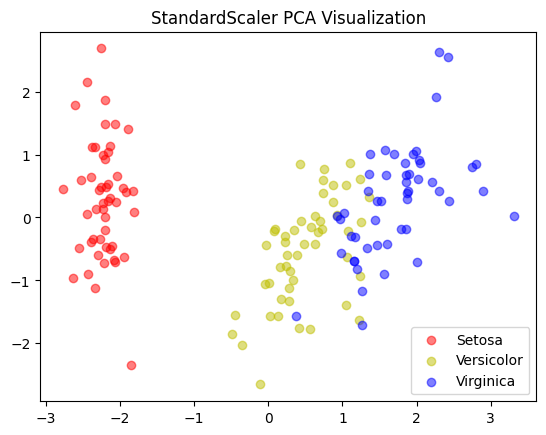

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(ss_newData[setosa_idx[i], 0], ss_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(ss_newData[versicolor_idx[i], 0], ss_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(ss_newData[virginica_idx[i], 0], ss_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("StandardScaler PCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, ss_newData))
print()

Locality Conservation Ratio:  0.7933333333333333



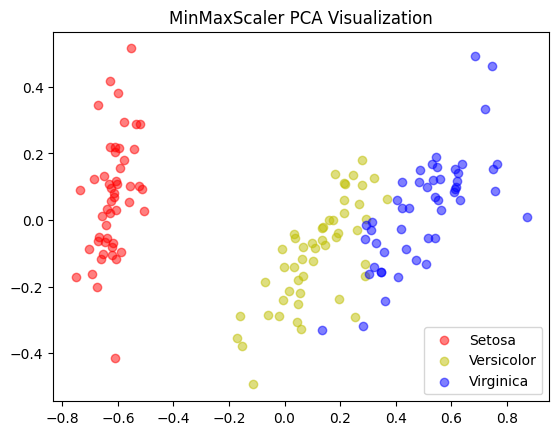

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(mm_newData[setosa_idx[i], 0], mm_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(mm_newData[versicolor_idx[i], 0], mm_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(mm_newData[virginica_idx[i], 0], mm_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MinMaxScaler PCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, mm_newData))
print()

Locality Conservation Ratio:  0.7226666666666667



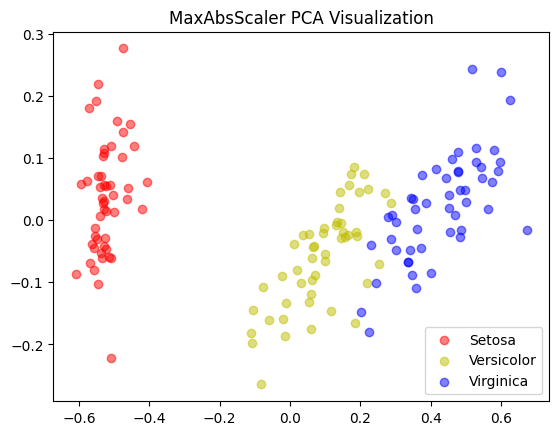

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(abs_newData[setosa_idx[i], 0], abs_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(abs_newData[versicolor_idx[i], 0], abs_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(abs_newData[virginica_idx[i], 0], abs_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MaxAbsScaler PCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, abs_newData))
print()

Locality Conservation Ratio:  0.668



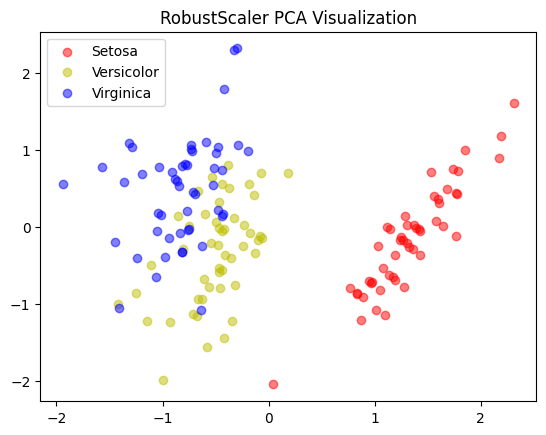

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(rob_newData[setosa_idx[i], 0], rob_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(rob_newData[versicolor_idx[i], 0], rob_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(rob_newData[virginica_idx[i], 0], rob_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("RobustScaler PCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, rob_newData))
print()

### sPCA Visualizations

Locality Conservation Ratio:  0.7399999999999999



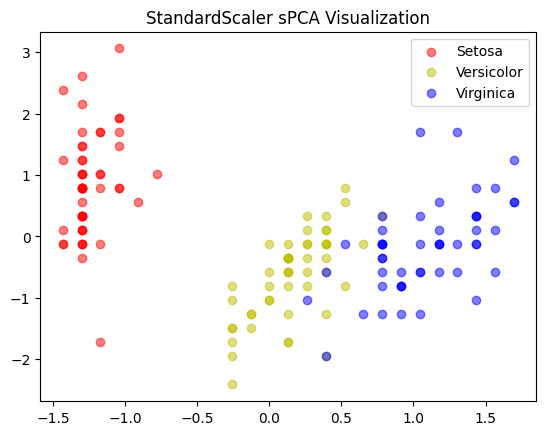

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(ss_sparse_newData[setosa_idx[i], 0], ss_sparse_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(ss_sparse_newData[versicolor_idx[i], 0], ss_sparse_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(ss_sparse_newData[virginica_idx[i], 0], ss_sparse_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("StandardScaler sPCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, ss_sparse_newData))
print()

Locality Conservation Ratio:  0.7946666666666666



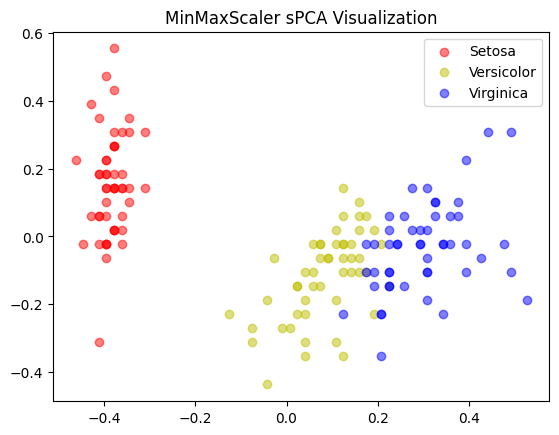

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(mm_sparse_newData[setosa_idx[i], 0], mm_sparse_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(mm_sparse_newData[versicolor_idx[i], 0], mm_sparse_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(mm_sparse_newData[virginica_idx[i], 0], mm_sparse_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MinMaxScaler sPCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, mm_sparse_newData))
print()

Locality Conservation Ratio:  0.724



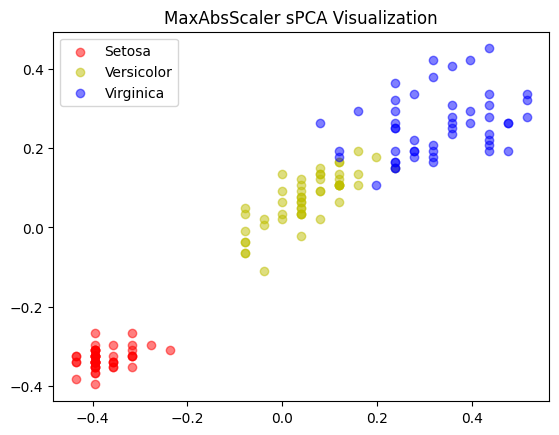

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(abs_sparse_newData[setosa_idx[i], 0], abs_sparse_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(abs_sparse_newData[versicolor_idx[i], 0], abs_sparse_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(abs_sparse_newData[virginica_idx[i], 0], abs_sparse_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MaxAbsScaler sPCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, abs_sparse_newData))
print()

Locality Conservation Ratio:  0.668



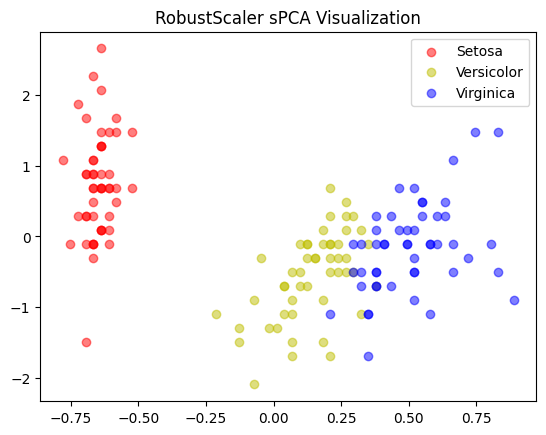

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(rob_sparse_newData[setosa_idx[i], 0], rob_sparse_newData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(rob_sparse_newData[versicolor_idx[i], 0], rob_sparse_newData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(rob_sparse_newData[virginica_idx[i], 0], rob_sparse_newData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("RobustScaler sPCA Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, rob_sparse_newData))
print()

### t-SNE Visualization

Locality Conservation Ratio:  0.6866666666666665



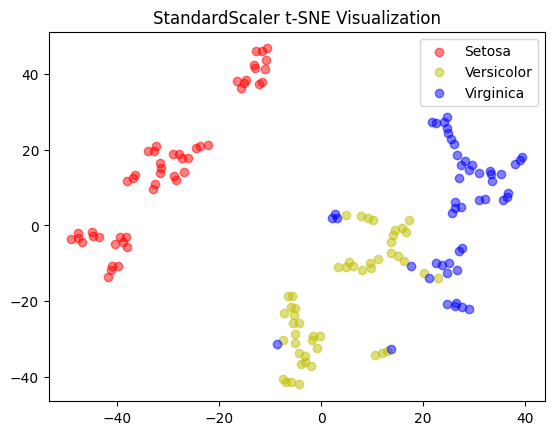

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(ss_embData[setosa_idx[i], 0], ss_embData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(ss_embData[versicolor_idx[i], 0], ss_embData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(ss_embData[virginica_idx[i], 0], ss_embData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("StandardScaler t-SNE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, ss_embData))
print()

Locality Conservation Ratio:  0.6853333333333333



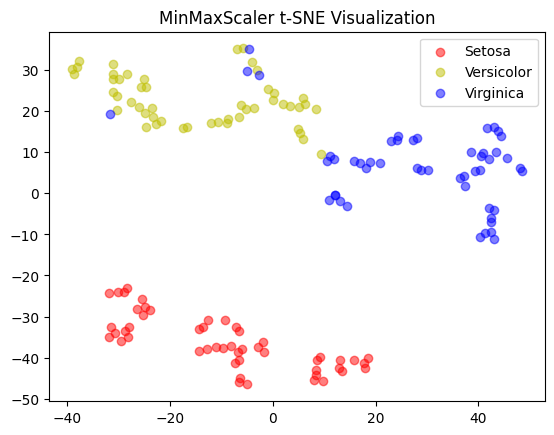

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(mm_embData[setosa_idx[i], 0], mm_embData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(mm_embData[versicolor_idx[i], 0], mm_embData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(mm_embData[virginica_idx[i], 0], mm_embData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MinMaxScaler t-SNE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, mm_embData))
print()

Locality Conservation Ratio:  0.6333333333333333



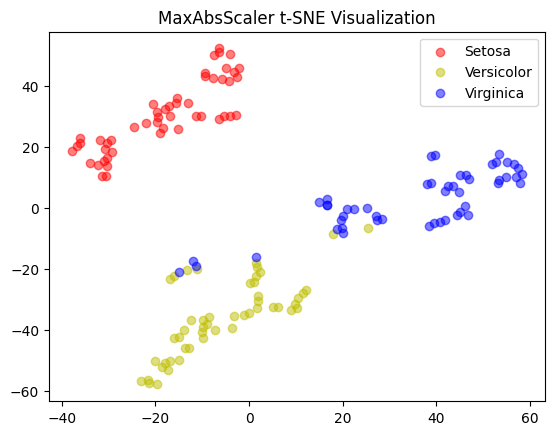

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(abs_embData[setosa_idx[i], 0], abs_embData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(abs_embData[versicolor_idx[i], 0], abs_embData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(abs_embData[virginica_idx[i], 0], abs_embData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MaxAbsScaler t-SNE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, abs_embData))
print()

Locality Conservation Ratio:  0.6199999999999999



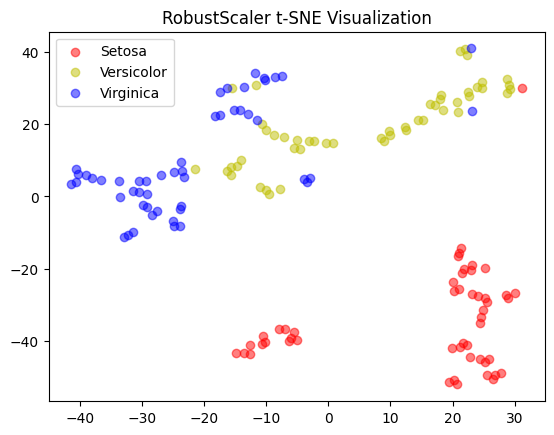

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(rob_embData[setosa_idx[i], 0], rob_embData[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(rob_embData[versicolor_idx[i], 0], rob_embData[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(rob_embData[virginica_idx[i], 0], rob_embData[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("RobustScaler t-SNE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, rob_embData))
print()

### UMAP Visualization

Locality Conservation Ratio:  0.6493333333333333



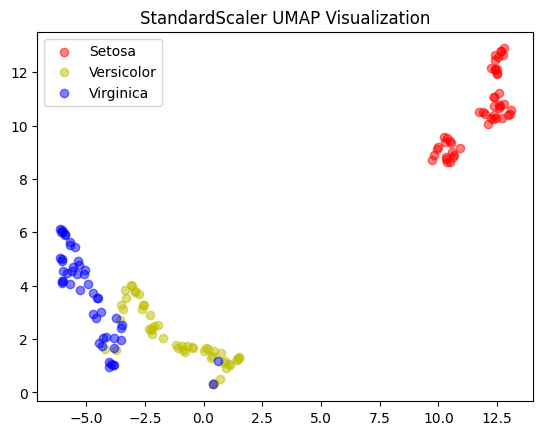

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(ss_embedding[setosa_idx[i], 0], ss_embedding[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(ss_embedding[versicolor_idx[i], 0], ss_embedding[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(ss_embedding[virginica_idx[i], 0], ss_embedding[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("StandardScaler UMAP Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, ss_embedding))
print()

Locality Conservation Ratio:  0.6613333333333332



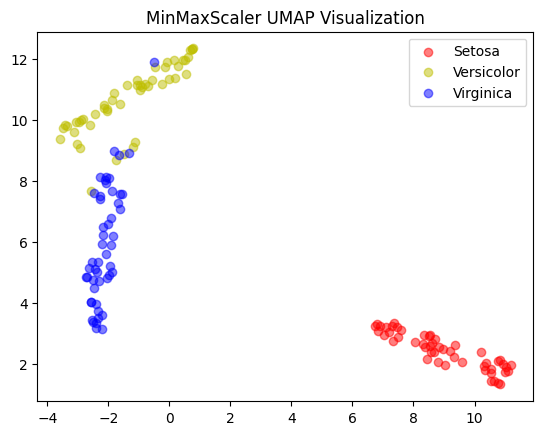

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(mm_embedding[setosa_idx[i], 0], mm_embedding[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(mm_embedding[versicolor_idx[i], 0], mm_embedding[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(mm_embedding[virginica_idx[i], 0], mm_embedding[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MinMaxScaler UMAP Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, mm_embedding))
print()

Locality Conservation Ratio:  0.588



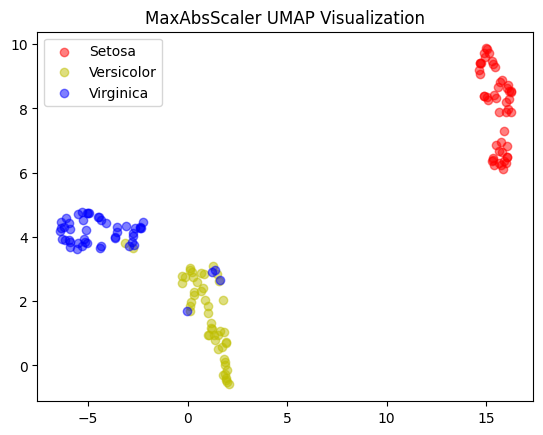

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(abs_embedding[setosa_idx[i], 0], abs_embedding[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(abs_embedding[versicolor_idx[i], 0], abs_embedding[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(abs_embedding[virginica_idx[i], 0], abs_embedding[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MaxAbsScaler UMAP Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, abs_embedding))
print()

Locality Conservation Ratio:  0.5733333333333334



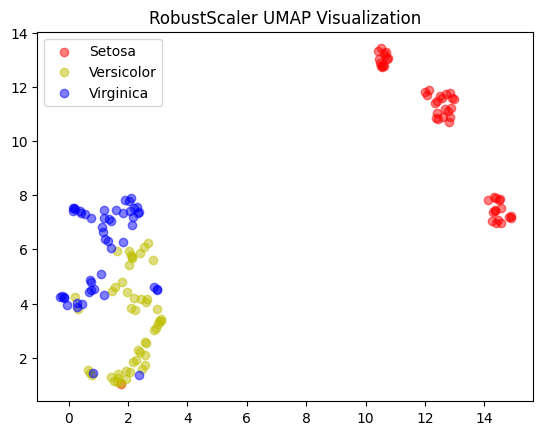

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(rob_embedding[setosa_idx[i], 0], rob_embedding[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(rob_embedding[versicolor_idx[i], 0], rob_embedding[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(rob_embedding[virginica_idx[i], 0], rob_embedding[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("RobustScaler UMAP Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, rob_embedding))
print()

### LLE Visualization

Locality Conservation Ratio:  0.37866666666666665



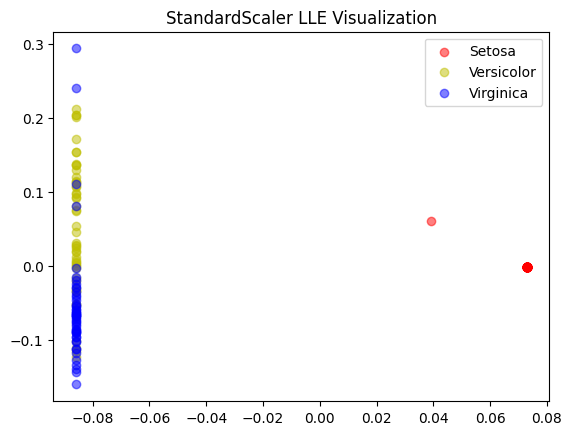

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(ss_lle[setosa_idx[i], 0], ss_lle[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(ss_lle[versicolor_idx[i], 0], ss_lle[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(ss_lle[virginica_idx[i], 0], ss_lle[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("StandardScaler LLE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, ss_lle))
print()

Locality Conservation Ratio:  0.31866666666666665



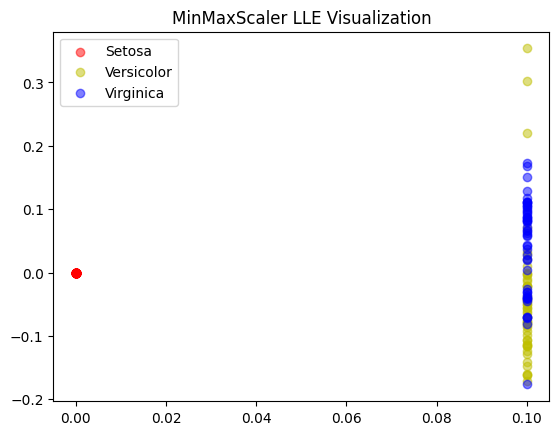

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(mm_lle[setosa_idx[i], 0], mm_lle[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(mm_lle[versicolor_idx[i], 0], mm_lle[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(mm_lle[virginica_idx[i], 0], mm_lle[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MinMaxScaler LLE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, mm_lle))
print()

Locality Conservation Ratio:  0.2773333333333333



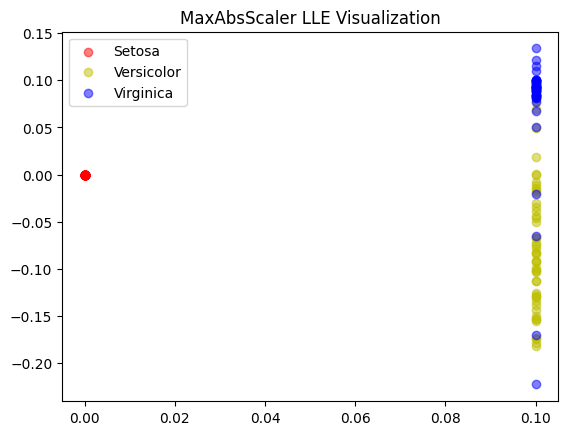

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(abs_lle[setosa_idx[i], 0], abs_lle[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(abs_lle[versicolor_idx[i], 0], abs_lle[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(abs_lle[virginica_idx[i], 0], abs_lle[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("MaxAbsScaler LLE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, abs_lle))
print()

Locality Conservation Ratio:  0.4720000000000001



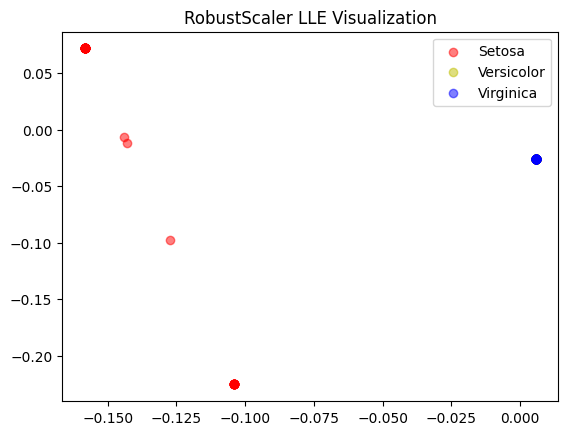

In [ ]:
for i in range(len(setosa_idx)):
  plt.scatter(rob_lle[setosa_idx[i], 0], rob_lle[setosa_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(versicolor_idx)):
  plt.scatter(rob_lle[versicolor_idx[i], 0], rob_lle[versicolor_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(virginica_idx)):
  plt.scatter(rob_lle[virginica_idx[i], 0], rob_lle[virginica_idx[i], 1], marker = 'o', c = 'b', alpha = 0.5)

plt.legend(labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("RobustScaler LLE Visualization")

print("Locality Conservation Ratio: ", compute_lcr(data, rob_lle))
print()

# Drug Discovery

In [ ]:
def mount_drive(dir):
  import os
  colab = 1
  if colab == 1:
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    current_folder = dir
    dest_folder = '/content/drive/My Drive/' + current_folder
    os.chdir(dest_folder)
    print('\n Current path: ' + os.getcwd())

mount_drive('')

Mounted at /content/drive

 Current path: /content/drive/My Drive


In [ ]:
def doPCA2(data, normaliztion_bit = 1):
  if normaliztion_bit == 1:
    normalized_data = MinMaxScaler().fit_transform(data)
  elif normaliztion_bit == 2:
    normalized_data = StandardScaler().fit_transform(data)
  elif normaliztion_bit == 3:
    normalized_data = MaxAbsScaler().fit_transform(data)
  elif normaliztion_bit == 4:
    normalized_data = RobustScaler().fit_transform(data)
  else:
    normalized_data = data

  pca = PCA(n_components=14)
  newData = pca.fit_transform(normalized_data)

  PC1 = newData[:,0]
  PC2 = newData[:,1]
  loadings = pca.components_

  normalized_data = pd.DataFrame(data = normalized_data, columns = data.columns, index = data.index)

  return newData, pca, loadings, PC1, PC2, normalized_data

In [ ]:
def scaled_PCs(PC1, PC2):
  PC1_scaled = 1.0/(PC1.max()-PC1.min())
  PC2_scaled = 1.0/(PC2.max()-PC2.min())

  return PC1_scaled, PC2_scaled

In [ ]:
def rank(pcaNewData):
  dim = 2
  new_data_2 = pcaNewData[:, 0:dim]
  new_data_2_norm = np.zeros(len(new_data_2))

  for i in range(len(new_data_2)):
    new_data_2_norm[i] = new_data_2[i,0]**2 + new_data_2[i,1]**2
  sorted_new_data_2_norm = np.sort(-new_data_2_norm)
  norm_idx = np.argsort(-new_data_2_norm)

  top_rank_no = 20
  pca_ranked_idx = norm_idx[0:top_rank_no]

  return pca_ranked_idx

In [ ]:
def PCA_biplot_outliers(features, loadings, PC1, PC2, PC1_scaled, PC2_scaled, target, pcaNewData, pca_ranked_idx, title, names):
  fig, ax = plt.subplots(figsize = (14, 9))

  scatter = ax.scatter(PC1 * PC1_scaled , PC2 *  PC2_scaled, c = target, cmap = 'PiYG')

  outlier_PC1 = PC1[pca_ranked_idx] * PC1_scaled
  outlier_PC2 = PC2[pca_ranked_idx] * PC2_scaled
  ax.scatter(outlier_PC1, outlier_PC2, marker='D', color='yellow', edgecolor='k', alpha=0.8, label='Outliers')

  for i, (x, y) in enumerate(zip(outlier_PC1, outlier_PC2)):
        ax.text(x, y, f'{names[i]}', fontsize=12, color='black', ha='right')

  ax.set_xlabel('PC1', fontsize=20)
  ax.set_ylabel('PC2', fontsize=20)
  ax.set_title(title)

  ax.legend(*scatter.legend_elements(),
            loc ="lower left",
            title = "bin type")

  plt.show()

In [ ]:
def tsne_umap_lle_plot(zero_idx, one_idx, emb, title):
  for i in range(len(zero_idx)):
    plt.scatter(emb[zero_idx[i], 0], emb[zero_idx[i], 1], marker = 'o', c = 'pink', alpha = 0.5)
  for i in range(len(one_idx)):
    plt.scatter(emb[one_idx[i], 0], emb[one_idx[i], 1], marker = 'o', c = 'green', alpha = 0.5)


  plt.legend(labels = ['zero_idx', 'one_idx'])
  plt.title(title)

In [ ]:
def doDBSCAN(data, eps, min_samples):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  model = dbscan.fit(data)
  lab = model.labels_
  return model, lab

In [ ]:
def get_cluster_info(dbscan_model):
    labels = dbscan_model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f'Number of clusters: {n_clusters}')
    print(f'Number of noise points: {n_noise}')
    return labels

In [ ]:
GDSC_IC50 = pd.read_csv('/content/drive/MyDrive/DSC_43C8/projectFall2024.1/GDSC_IC50.csv')

In [ ]:
missing_rows = GDSC_IC50[GDSC_IC50.isnull().any(axis=1)]
missing = np.where(GDSC_IC50.isna())
print("Rows that have nulls: ", missing_rows)

Rows that have nulls:  Empty DataFrame
Columns: [Unnamed: 0, AICAR, AKT inhibitor VIII, AS601245, AZD6482, AZD7762, AZD8055, BIBW2992, BMS-708163, Axitinib, BAY 61-3606, BMS-754807, BX-795, Bexarotene, Bicalutamide, Bleomycin, Bosutinib, Bryostatin 1, CCT018159, CCT007093, CHIR-99021, CI-1040, Cisplatin, Cytarabine, DMOG, LAQ824, NVP-BEZ235, Docetaxel, BIRB 0796, Doxorubicin, EHT 1864, Elesclomol, embelin, Epothilone B, etoposide, FH535, FTI-277, GSK-1904529A, GSK-650394, GW 441756, Gefitinib, Gemcitabine, IPA-3, JNK Inhibitor VIII, JNK-9L, KU-55933, LFM-A13, lenalidomide, CEP-701, OSI-906, MK-2206, Methotrexate, Midostaurin, Mitomycin-C, AMG-706, NSC-87877, NU-7441, ABT-263, Nilotinib, Nutlin-3, OSU-03012, Obatoclax Mesylate, AZD-2281, pac-1, PD-0325901, PD173074, PF-4708671, PF-562271, PLX4720, PD-0332991, Pazopanib, GDC-0449, AP-24534, QS11, RO-3306, RDEA119, AG-014699, SB 216763, SB590885, SL 0101-1, Camptothecin, GDC-0941, AZD6244, JNJ-26854165, shikonin, TW 37, 17-AAG, temsirolim

In [ ]:
GDSC_IC50_mean_cal = GDSC_IC50.drop(columns=['Unnamed: 0'])
GDSC_IC50['mean'] = GDSC_IC50_mean_cal.mean(axis=1)
GDSC_IC50.head()

Unnamed: 0     AICAR  AKT inhibitor VIII  AS601245   AZD6482   AZD7762  \
0      22RV1  3.965136            0.820480  1.936570  1.890533  0.257326   
1   23132-87  3.866856           -0.119539  0.851399  0.527096 -0.595605   
2      639-V  3.538460            1.290422  0.684452  0.506095 -0.235257   
3      647-V  3.033642            0.769178  2.207381  1.381588 -0.419264   
4        697  2.932297            0.855971  0.932485  0.604456 -1.164312   

    AZD8055  BIBW2992  BMS-708163  Axitinib  ...      ATRA    VX-702  \
0 -0.150478  1.533713    1.883827  1.245227  ...  2.987153  1.737838   
1 -0.175110  1.350415    1.947032  2.135858  ...  2.740050  2.426133   
2  0.207198  0.709714    2.745642  0.209653  ...  3.091687  1.901405   
3  0.065199  0.970675    2.370110  2.218560  ...  2.124781  2.152421   
4 -1.065122  0.668461    2.994446  0.372962  ...  2.078380  1.590226   

    ABT-888  Vinblastine  Vinorelbine    AUY922  Vorinostat    681640  \
0  2.651122    -2.008103    -2.056151 -1.455069    0.413759  1.607273   
1  2.678104    -1.826055    -2.158317 -0.979319    0.187713  1.625344   
2  1.528742    -2.324433    -2.179847 -2.314079    0.244009  2.135621   
3  2.604169    -1.614293    -1.680123 -0.825599    0.661365  1.203046   
4  2.469714    -2.257862    -2.373868 -1.692262   -0.392101  0.395039   

   ZM-447439      mean  
0   2.082147  1.067762  
1   2.123343  1.007436  
2   1.831318  0.599750  
3   2.210548  1.013919  
4  -0.025245  0.317663  

[5 rows x 100 columns]

In [ ]:
GDSC_IC50.columns = GDSC_IC50.columns.str.strip()
mean_indicator = GDSC_IC50['mean'].mean()
mean_indicator

1.0402759339234233

In [ ]:
GDSC_IC50['bin_type'] = (GDSC_IC50['mean'] < mean_indicator).astype(int)
target = GDSC_IC50['bin_type']
features = GDSC_IC50.drop(columns=["bin_type"]).columns

In [ ]:
GDSC_IC50 = GDSC_IC50.drop(columns = ['mean'])
GDSC_IC50 = GDSC_IC50.drop(columns = ['bin_type'])
GDSC_IC50_cell_names = GDSC_IC50['Unnamed: 0']
GDSC_IC50_cell_names = GDSC_IC50_cell_names.to_numpy()
GDSC_IC50 = GDSC_IC50.drop(columns = ['Unnamed: 0'])

In [ ]:
ss_GDSC_newData, ss_GDSC_pca, ss_GDSC_loadings, ss_GDSC_PC1, ss_GDSC_PC2, ss_GDSC_normalized_data = doPCA2(GDSC_IC50, 1)
mm_GDSC_newData, mm_GDSC_pca, mm_GDSC_loadings, mm_GDSC_PC1, mm_GDSC_PC2, mm_GDSC_normalized_data = doPCA2(GDSC_IC50, 2)
ma_GDSC_newData, ma_GDSC_pca, ma_GDSC_loadings, ma_GDSC_PC1, ma_GDSC_PC2, ma_GDSC_normalized_data = doPCA2(GDSC_IC50, 3)
r_GDSC_newData, r_GDSC_pca, r_GDSC_loadings, r_GDSC_PC1, r_GDSC_PC2, r_GDSC_normalized_data = doPCA2(GDSC_IC50, 4)

ss_GDSC_PC1_scaled, ss_GDSC_PC2_scaled = scaled_PCs(ss_GDSC_PC1, ss_GDSC_PC2)
mm_GDSC_PC1_scaled, mm_GDSC_PC2_scaled = scaled_PCs(mm_GDSC_PC1, mm_GDSC_PC2)
ma_GDSC_PC1_scaled, ma_GDSC_PC2_scaled = scaled_PCs(ma_GDSC_PC1, ma_GDSC_PC2)
r_GDSC_PC1_scaled, r_GDSC_PC2_scaled = scaled_PCs(r_GDSC_PC1, r_GDSC_PC2)

ss_pca_ranked_idx = rank(ss_GDSC_newData)
mm_pca_ranked_idx = rank(mm_GDSC_newData)
ma_pca_ranked_idx = rank(ma_GDSC_newData)
r_pca_ranked_idx = rank(r_GDSC_newData)

In [ ]:
ss_embData_GDSC, ss_emb_GDSC, ss_div_GDSC = doTSNE(GDSC_IC50, 10, 1)
mm_embData_GDSC, mm_emb_GDSC, mm_div_GDSC = doTSNE(GDSC_IC50, 10, 2)
ma_embData_GDSC, ma_emb_GDSC, ma_div_GDSC = doTSNE(GDSC_IC50, 10, 3)
r_embData_GDSC, r_emb_GDSC, r_div_GDSC = doTSNE(GDSC_IC50, 10, 4)

In [ ]:
ss_umap_embedding_GDSC = doUMAP(GDSC_IC50, 25, "spectral", 1)
mm_umap_embedding_GDSC = doUMAP(GDSC_IC50, 25, "spectral", 2)
ma_umap_embedding_GDSC = doUMAP(GDSC_IC50, 25, "spectral", 3)
r_umap_embedding_GDSC = doUMAP(GDSC_IC50, 25, "spectral", 4)

In [ ]:
ss_lle_GDSC = doLLE(GDSC_IC50, 1)
mm_lle_GDSC = doLLE(GDSC_IC50, 2)
ma_lle_GDSC = doLLE(GDSC_IC50, 3)
r_lle_GDSC = doLLE(GDSC_IC50, 4)

In [ ]:
target = np.array(target)
zero_idx = np.where(target == 0)
one_idx = np.where(target == 1)

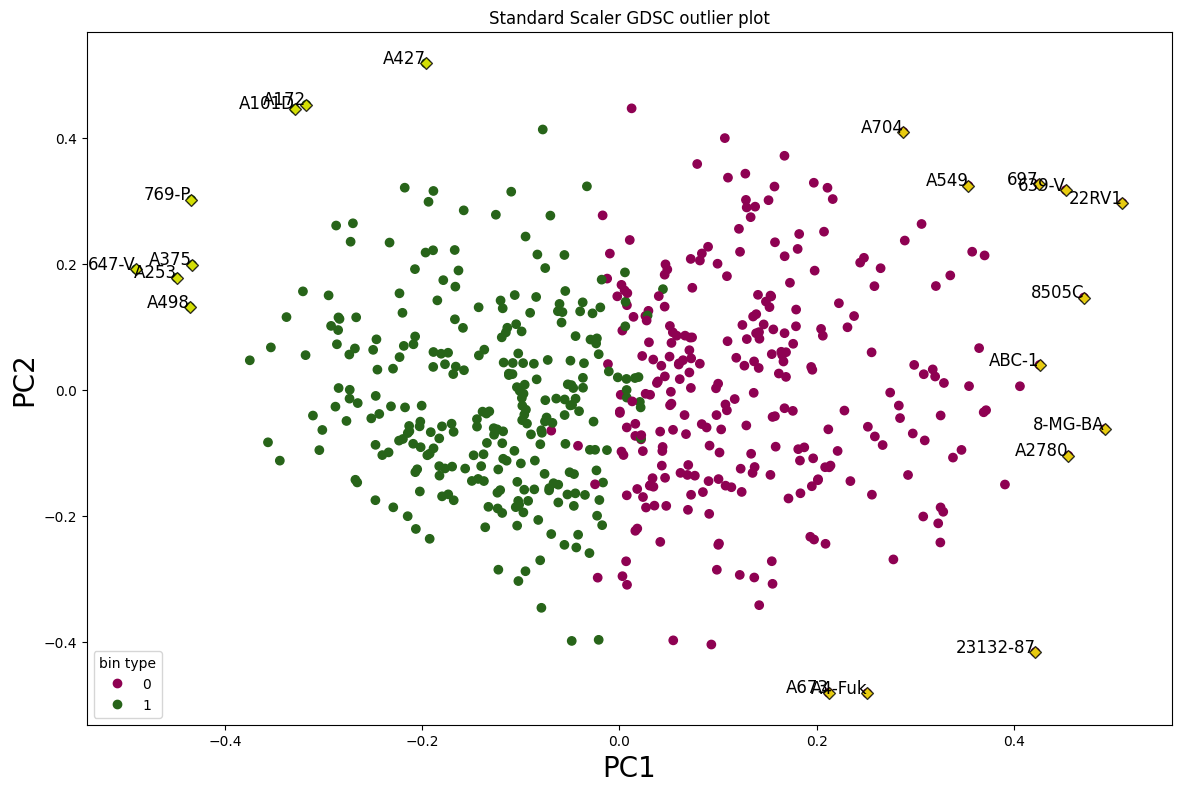

In [ ]:
PCA_biplot_outliers(features, ss_GDSC_loadings, ss_GDSC_PC1, ss_GDSC_PC2, ss_GDSC_PC1_scaled, ss_GDSC_PC2_scaled, target, ss_GDSC_newData, ss_pca_ranked_idx, "Standard Scaler GDSC outlier plot", GDSC_IC50_cell_names)


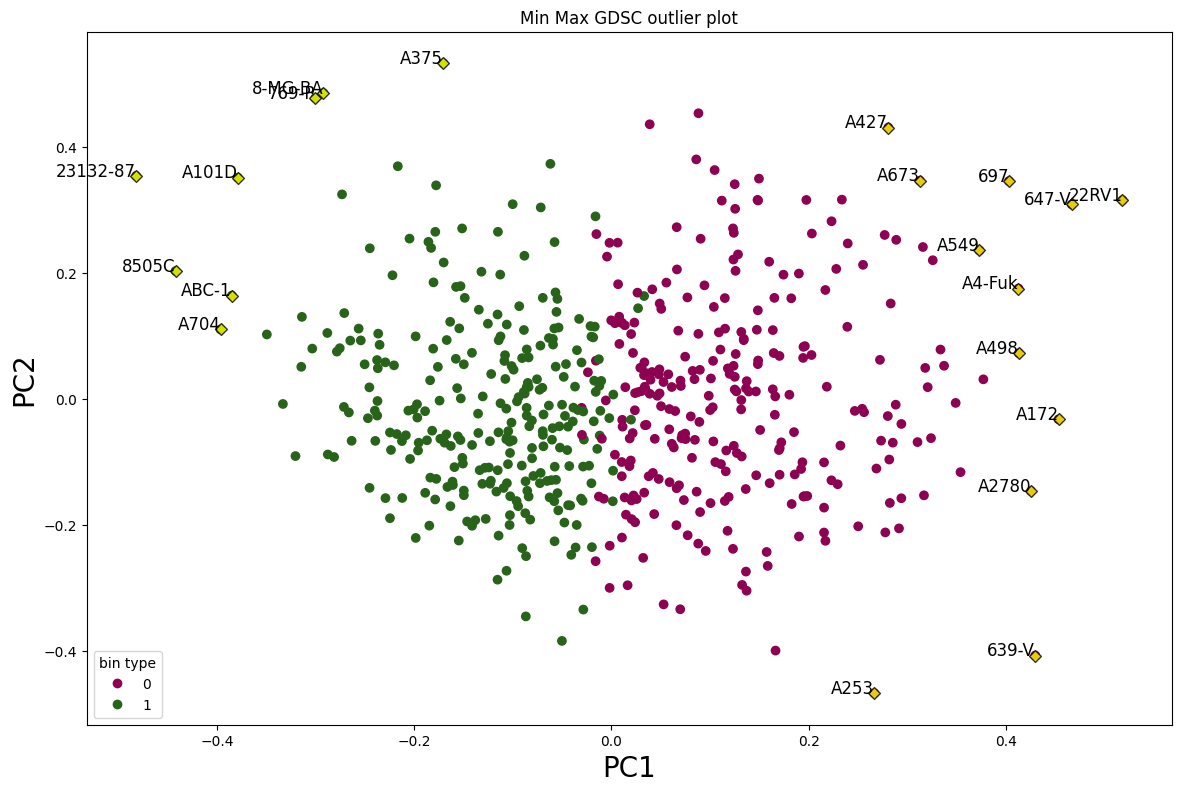

In [ ]:
PCA_biplot_outliers(features, mm_GDSC_loadings, mm_GDSC_PC1, mm_GDSC_PC2, mm_GDSC_PC1_scaled, mm_GDSC_PC2_scaled, target, mm_GDSC_newData, mm_pca_ranked_idx, "Min Max GDSC outlier plot", GDSC_IC50_cell_names)


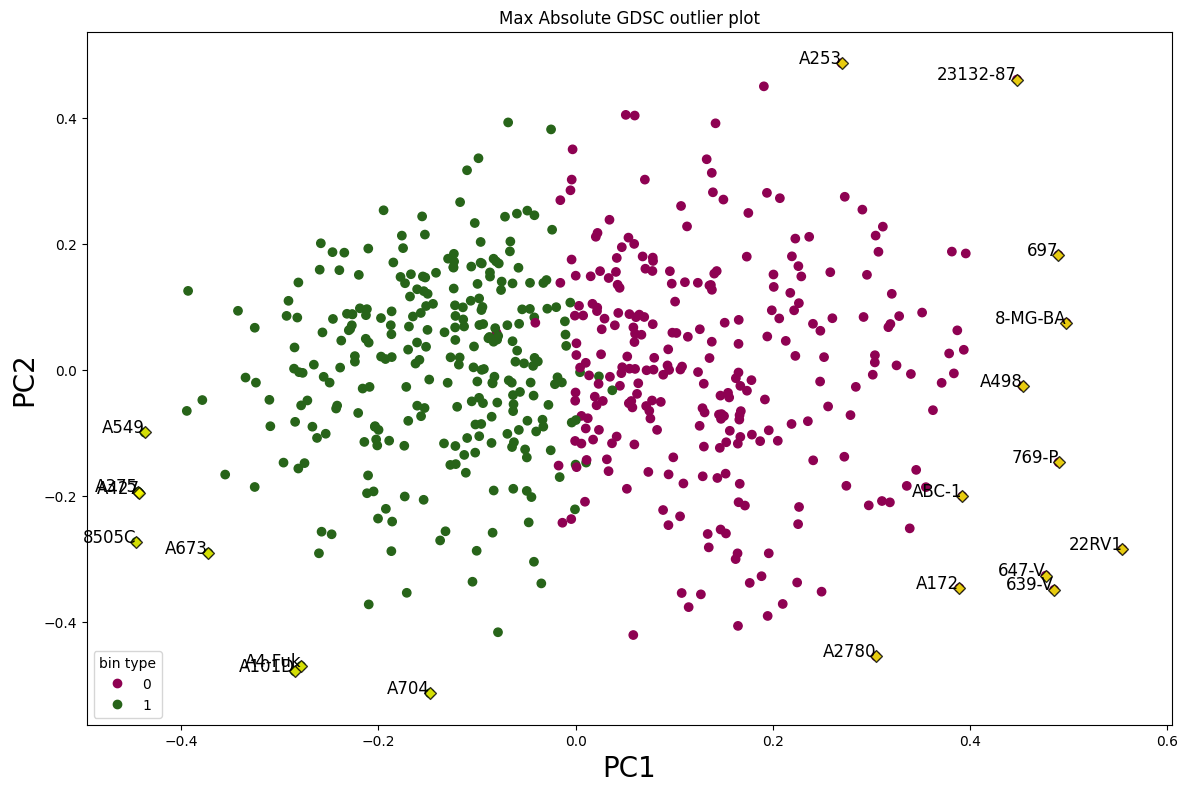

In [ ]:
PCA_biplot_outliers(features, ma_GDSC_loadings, ma_GDSC_PC1, ma_GDSC_PC2, ma_GDSC_PC1_scaled, ma_GDSC_PC2_scaled, target, ma_GDSC_newData, ma_pca_ranked_idx, "Max Absolute GDSC outlier plot", GDSC_IC50_cell_names)


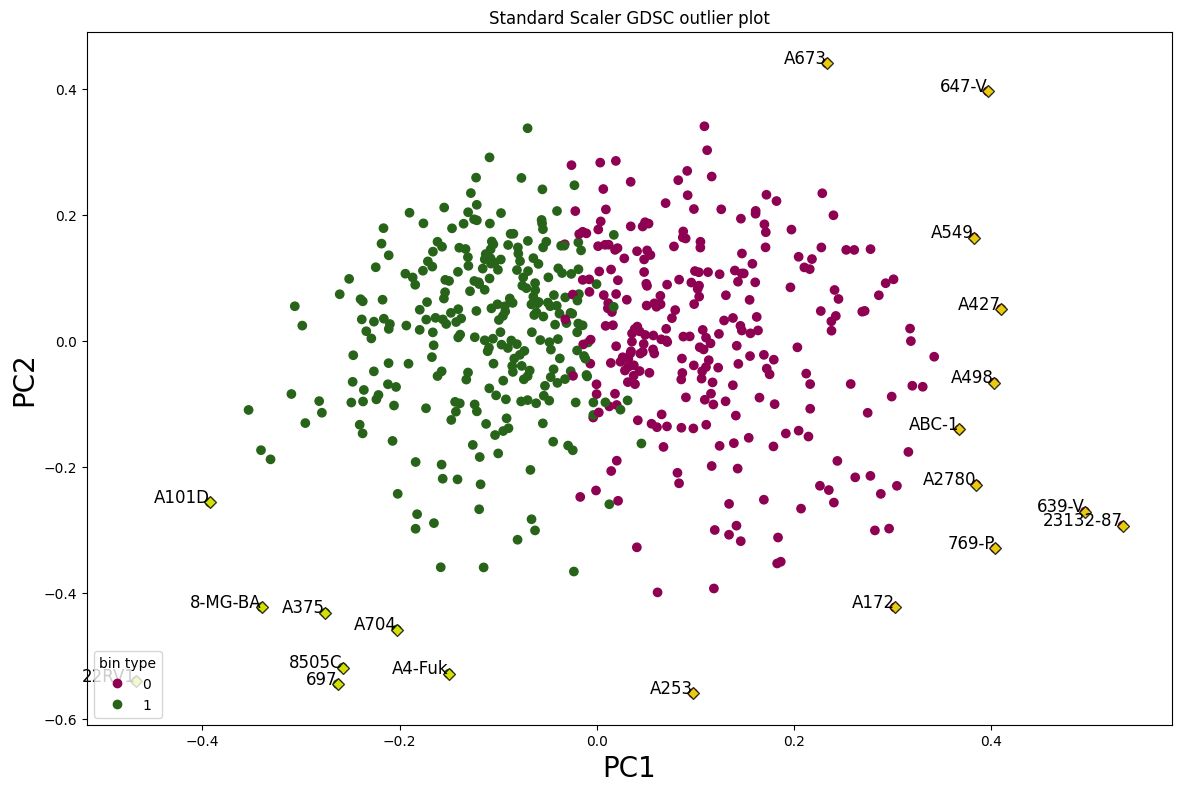

In [ ]:
PCA_biplot_outliers(features, r_GDSC_loadings, r_GDSC_PC1, r_GDSC_PC2, r_GDSC_PC1_scaled, r_GDSC_PC2_scaled, target, r_GDSC_newData, r_pca_ranked_idx, "Standard Scaler GDSC outlier plot", GDSC_IC50_cell_names)


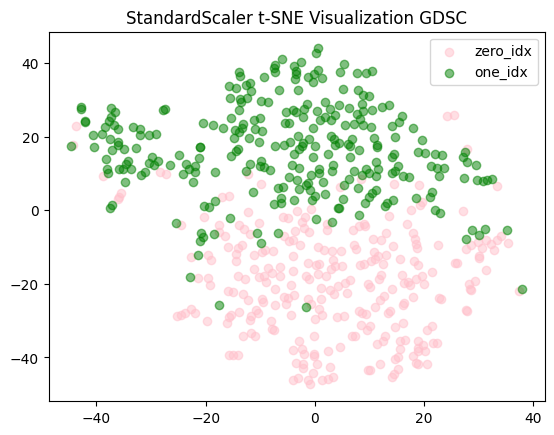

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, ss_embData_GDSC, "StandardScaler t-SNE Visualization GDSC")


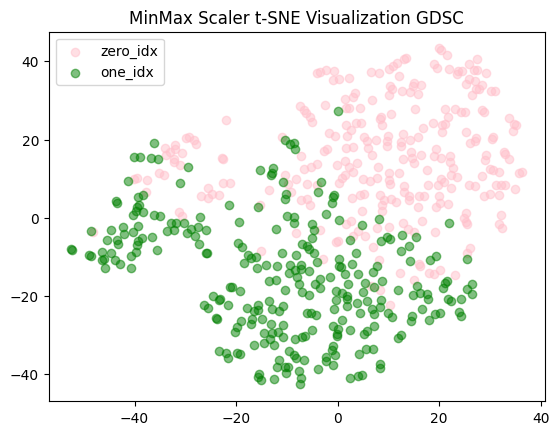

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, mm_embData_GDSC, "MinMax Scaler t-SNE Visualization GDSC")


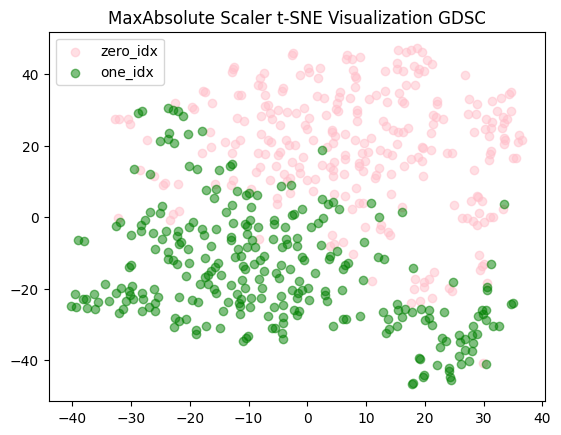

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, ma_embData_GDSC, "MaxAbsolute Scaler t-SNE Visualization GDSC")


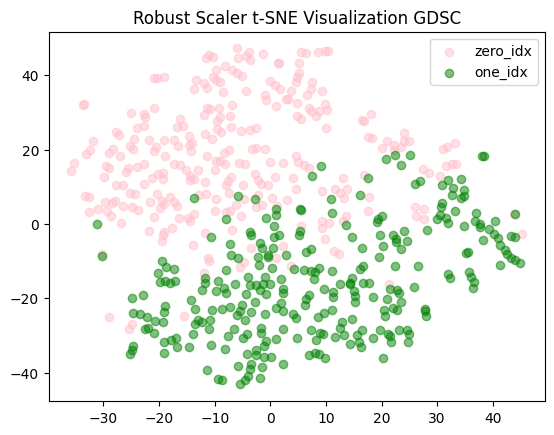

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, r_embData_GDSC, "Robust Scaler t-SNE Visualization GDSC")


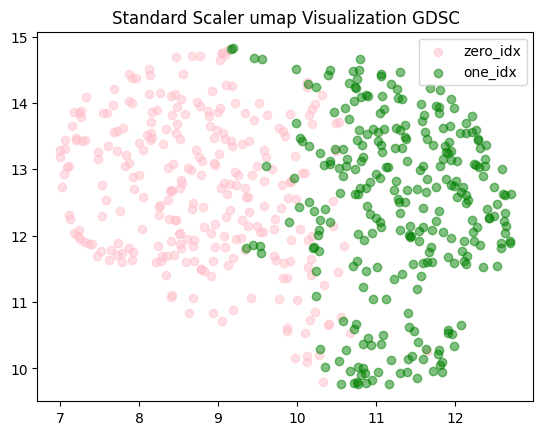

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, ss_umap_embedding_GDSC, "Standard Scaler umap Visualization GDSC")


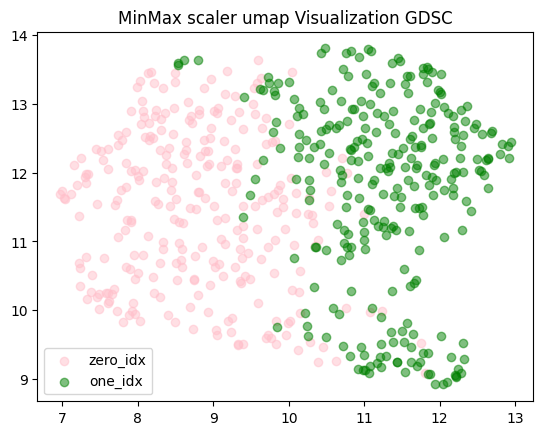

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, mm_umap_embedding_GDSC, "MinMax scaler umap Visualization GDSC")


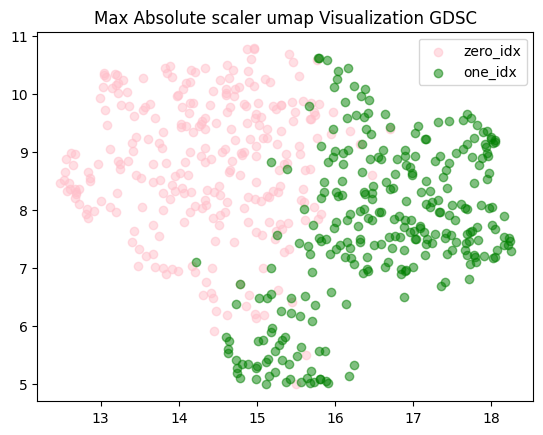

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, ma_umap_embedding_GDSC, "Max Absolute scaler umap Visualization GDSC")


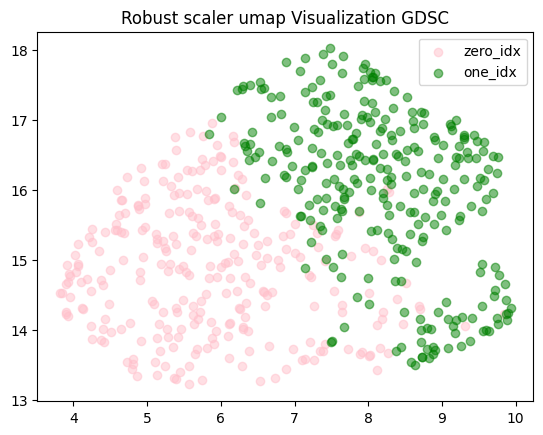

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, r_umap_embedding_GDSC, "Robust scaler umap Visualization GDSC")


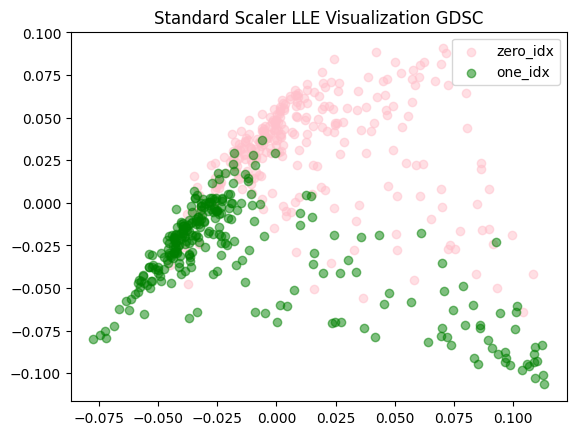

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, ss_lle_GDSC, "Standard Scaler LLE Visualization GDSC")


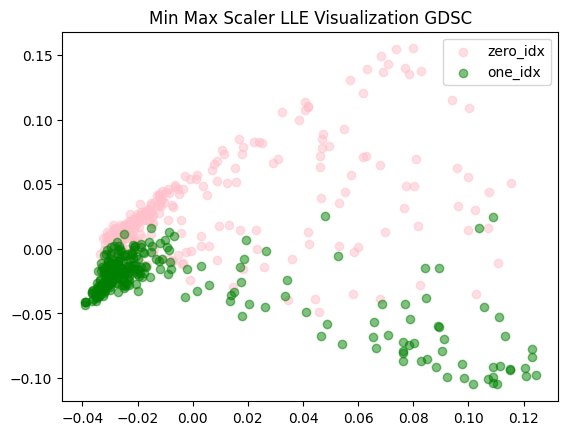

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, mm_lle_GDSC, "Min Max Scaler LLE Visualization GDSC")


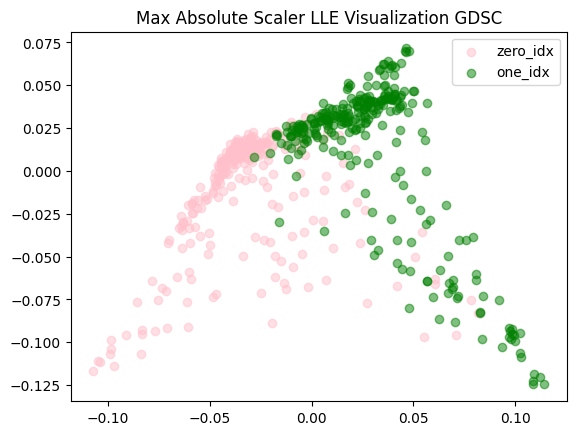

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, ma_lle_GDSC, "Max Absolute Scaler LLE Visualization GDSC")


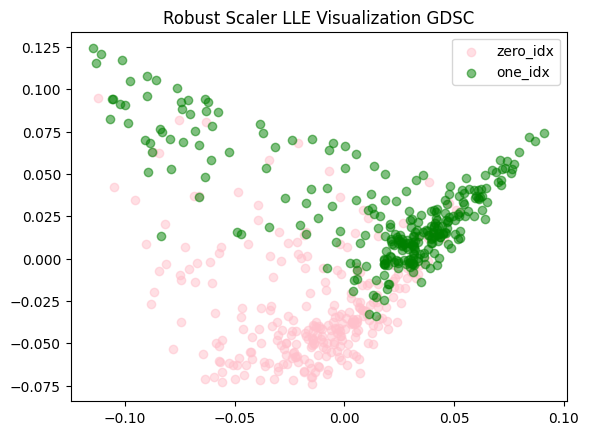

In [ ]:
tsne_umap_lle_plot(zero_idx, one_idx, r_lle_GDSC, "Robust Scaler LLE Visualization GDSC")


In [ ]:
ss_tsne_DBSCAN_model, lab_ss_tsne = doDBSCAN(ss_emb_GDSC, 5, 3)
mm_tsne_DBSCAN_model, lab_mm_tsne= doDBSCAN(mm_emb_GDSC, 5, 3)
ma_tsne_DBSCAN_model, lab_ma_tsne= doDBSCAN(ma_emb_GDSC, 5, 3)
r_tsne_DBSCAN_model, lab_r_tsne= doDBSCAN(r_emb_GDSC, 5, 3)

print("Standard Scaler TSNE DBSCAN cluster info: ")
labs_ss_tnse = get_cluster_info(ss_tsne_DBSCAN_model)

print("\nMin Max Scaler TSNE DBSCAN cluster info: ")
labs_mm_tnse = get_cluster_info(mm_tsne_DBSCAN_model)

print("\nMax Absolute Scaler TSNE DBSCAN cluster info: ")
labs_ma_tnse = get_cluster_info(ma_tsne_DBSCAN_model)

print("\nRobust Scaler TSNE DBSCAN cluster info: ")
labs_r_tnse = get_cluster_info(r_tsne_DBSCAN_model)

Standard Scaler TSNE DBSCAN cluster info: 
Number of clusters: 3
Number of noise points: 8

Min Max Scaler TSNE DBSCAN cluster info: 
Number of clusters: 4
Number of noise points: 3

Max Absolute Scaler TSNE DBSCAN cluster info: 
Number of clusters: 6
Number of noise points: 5

Robust Scaler TSNE DBSCAN cluster info: 
Number of clusters: 3
Number of noise points: 6


In [ ]:
ss_umap_DBSCAN_model, lab_ss_umap = doDBSCAN(ss_umap_embedding_GDSC, .5, 15)
mm_umap_DBSCAN_model, lab_mm_umap = doDBSCAN(mm_umap_embedding_GDSC, .5, 15)
ma_umap_DBSCAN_model, lab_ma_umap = doDBSCAN(ma_umap_embedding_GDSC, .5, 15)
r_umap_DBSCAN_model, lab_r_umap = doDBSCAN(r_umap_embedding_GDSC, .5, 15)

print("Standard Scaler umap DBSCAN cluster info: ")
labs_ss_umap = get_cluster_info(ss_umap_DBSCAN_model)

print("\nMin Max Scaler umap DBSCAN cluster info: ")
labs_mm_umap = get_cluster_info(mm_umap_DBSCAN_model)

print("\nMax Absolute Scaler umap DBSCAN cluster info: ")
labs_ma_umap = get_cluster_info(ma_umap_DBSCAN_model)

print("\nRobust Scaler umap DBSCAN cluster info: ")
labs_r_umap = get_cluster_info(r_umap_DBSCAN_model)

Standard Scaler umap DBSCAN cluster info: 
Number of clusters: 2
Number of noise points: 16

Min Max Scaler umap DBSCAN cluster info: 
Number of clusters: 2
Number of noise points: 12

Max Absolute Scaler umap DBSCAN cluster info: 
Number of clusters: 2
Number of noise points: 21

Robust Scaler umap DBSCAN cluster info: 
Number of clusters: 1
Number of noise points: 23


In [ ]:
ss_lle_DBSCAN_model, lab_ss_lle = doDBSCAN(ss_lle_GDSC, .015, 5)
mm_lle_DBSCAN_model, lab_mm_lle = doDBSCAN(mm_lle_GDSC, .015, 5)
ma_lle_DBSCAN_model, lab_ma_lle = doDBSCAN(ma_lle_GDSC, .015, 5)
r_lle_DBSCAN_model, lab_r_lle = doDBSCAN(r_lle_GDSC, .015, 5)

print("Standard Scaler umap DBSCAN cluster info: ")
labs_ss_lle = get_cluster_info(ss_lle_DBSCAN_model)

print("\nMin Max Scaler umap DBSCAN cluster info: ")
labs_mm_lle = get_cluster_info(mm_lle_DBSCAN_model)

print("\nMax Absolute Scaler umap DBSCAN cluster info: ")
labs_ma_lle = get_cluster_info(ma_lle_DBSCAN_model)

print("\nRobust Scaler umap DBSCAN cluster info: ")
labs_r_lle = get_cluster_info(r_lle_DBSCAN_model)

Standard Scaler umap DBSCAN cluster info: 
Number of clusters: 5
Number of noise points: 9

Min Max Scaler umap DBSCAN cluster info: 
Number of clusters: 5
Number of noise points: 23

Max Absolute Scaler umap DBSCAN cluster info: 
Number of clusters: 2
Number of noise points: 3

Robust Scaler umap DBSCAN cluster info: 
Number of clusters: 3
Number of noise points: 8


In [ ]:
model_metrics(target, lab_ss_tsne, "tsne", GDSC_IC50)
print()
model_metrics(target, lab_mm_tsne, "tsne", GDSC_IC50)
print()
model_metrics(target, lab_ma_tsne, "tsne", GDSC_IC50)
print()
model_metrics(target, lab_r_tsne, "tsne", GDSC_IC50)

Accuracy is 0.565766
Sensitivity is 0.196429
Specificity is 0.941818
Precision is 0.774648
Negative Prediction Ratio is 0.535124
F1-Score is 0.313390
Diagnostic Index is 1.296827
F1-Micro Score is 0.565766
F1-Macro Score is 0.251471
Balanced Accuracy Score is 0.569123
Mutual Information Score is 0.042205
Adjusted Mutual Information Score is 0.068255

Accuracy is 0.542342
Sensitivity is 0.217857
Specificity is 0.872727
Precision is 0.635417
Negative Prediction Ratio is 0.522876
F1-Score is 0.324468
Diagnostic Index is 1.253003
F1-Micro Score is 0.542342
F1-Macro Score is 0.198365
Balanced Accuracy Score is 0.545292
Mutual Information Score is 0.028324
Adjusted Mutual Information Score is 0.038529

Accuracy is 0.527928
Sensitivity is 0.207143
Specificity is 0.854545
Precision is 0.591837
Negative Prediction Ratio is 0.514223
F1-Score is 0.306878
Diagnostic Index is 1.225904
F1-Micro Score is 0.527928
F1-Macro Score is 0.140343
Balanced Accuracy Score is 0.530844
Mutual Information Score 

In [ ]:
model_metrics(target, lab_ss_umap, "umap", GDSC_IC50)
print()
model_metrics(target, lab_mm_umap, "umap", GDSC_IC50)
print()
model_metrics(target, lab_ma_umap, "umap", GDSC_IC50)
print()
model_metrics(target, lab_r_umap, "umap", GDSC_IC50)

Accuracy is 0.547748
Sensitivity is 0.171429
Specificity is 0.930909
Precision is 0.716418
Negative Prediction Ratio is 0.524590
F1-Score is 0.276657
Diagnostic Index is 1.263526
F1-Micro Score is 0.547748
F1-Macro Score is 0.320407
Balanced Accuracy Score is 0.551169
Mutual Information Score is 0.028946
Adjusted Mutual Information Score is 0.047227

Accuracy is 0.538739
Sensitivity is 0.185714
Specificity is 0.898182
Precision is 0.650000
Negative Prediction Ratio is 0.520000
F1-Score is 0.288889
Diagnostic Index is 1.246502
F1-Micro Score is 0.538739
F1-Macro Score is 0.319255
Balanced Accuracy Score is 0.541948
Mutual Information Score is 0.012439
Adjusted Mutual Information Score is 0.017897

Accuracy is 0.536937
Sensitivity is 0.203571
Specificity is 0.876364
Precision is 0.626374
Negative Prediction Ratio is 0.519397
F1-Score is 0.307278
Diagnostic Index is 1.242958
F1-Micro Score is 0.536937
F1-Macro Score is 0.325934
Balanced Accuracy Score is 0.539968
Mutual Information Score 

In [ ]:
model_metrics(target, lab_ss_lle, "lle", GDSC_IC50)
print()
model_metrics(target, lab_mm_lle, "lle", GDSC_IC50)
print()
model_metrics(target, lab_ma_lle, "lle", GDSC_IC50)
print()
model_metrics(target, lab_r_lle, "lle", GDSC_IC50)

Accuracy is 0.538739
Sensitivity is 0.128571
Specificity is 0.956364
Precision is 0.750000
Negative Prediction Ratio is 0.518738
F1-Score is 0.219512
Diagnostic Index is 1.246988
F1-Micro Score is 0.538739
F1-Macro Score is 0.151947
Balanced Accuracy Score is 0.542468
Mutual Information Score is 0.046067
Adjusted Mutual Information Score is 0.069866

Accuracy is 0.473874
Sensitivity is 0.139286
Specificity is 0.814545
Precision is 0.433333
Negative Prediction Ratio is 0.481720
F1-Score is 0.210811
Diagnostic Index is 1.122200
F1-Micro Score is 0.473874
F1-Macro Score is 0.142768
Balanced Accuracy Score is 0.476916
Mutual Information Score is 0.082291
Adjusted Mutual Information Score is 0.110077

Accuracy is 0.468468
Sensitivity is 0.000000
Specificity is 0.945455
Precision is 0.000000
Negative Prediction Ratio is 0.481481
F1-Score is 0.000000
Diagnostic Index is 1.112803
F1-Micro Score is 0.468468
F1-Macro Score is 0.212940
Balanced Accuracy Score is 0.472727
Mutual Information Score 

# Big Patent Data

In [ ]:
patents = pd.read_csv("/content/drive/MyDrive/DSC_43C8/projectFall2024.1/PatentCleanData.csv")
patents.head()

Patent_Num  1      2     3  4  5  6  7       8   9  ...  23  25  26  \
0  CN202010573882.6  1   4.16  0.85  1  1  1  1  430000  16  ...   0   0   0   
1  CN202210759372.7  1   1.36  0.84  1  3  1  5  320000  10  ...   0   0   0   
2  CN202021167614.6  2   4.16  0.56  1  1  1  7  430000   7  ...   0   0   0   
3  CN201911132985.2  1   4.98  0.96  5  1  5  2  110000   8  ...   5   2   0   
4  CN201410423517.1  1  12.25  1.61  5  1  5  1  500000   8  ...  24   0   0   

        27  28   29  30  31  32  classID  
0  32666.0   1  209  13   6   0        1  
1  31522.0   1  302  12   2   0        1  
2  33461.0   1  623  11   5   0        1  
3  32666.0   1  209   4   2   0        1  
4  32666.0   1  209   3   2   0        1  

[5 rows x 33 columns]

In [ ]:
pat_target = patents['classID']
patents_2 = patents.copy()
patents_2.drop(['Patent_Num', 'classID'], inplace = True, axis = 1)

In [ ]:
ss_pca_patent, ss_patent_PCs, ss_patent_exp_var, ss_patent_evr = doPCA(patents_2, 1)
mm_pca_patent, mm_patent_PCs, mm_patent_exp_var, mm_patent_evr = doPCA(patents_2, 2)
abs_pca_patent, abs_patent_PCs, abs_patent_exp_var, abs_patent_evr = doPCA(patents_2, 3)
rob_pca_patent, rob_patent_PCs, rob_patent_exp_var, rob_patent_evr = doPCA(patents_2, 4)

In [ ]:
zero_idx = np.where(pat_target == 0)
one_idx = np.where(pat_target == 1)

## PCA Patent

### StandardScaler PCA Patent

Text(0.5, 1.0, 'StandardScaler PCA Visualization')

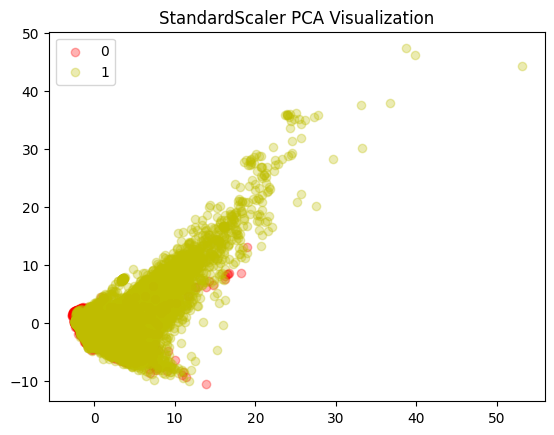

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(ss_pca_patent[zero_idx[i], 0], ss_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.3)
for i in range(len(one_idx)):
  plt.scatter(ss_pca_patent[one_idx[i], 0], ss_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.3)

plt.legend(labels = [0, 1])
plt.title("StandardScaler PCA Visualization")

Plot outliers

Text(0.5, 1.0, 'StandardScaler PCA Visualization with Outliers')

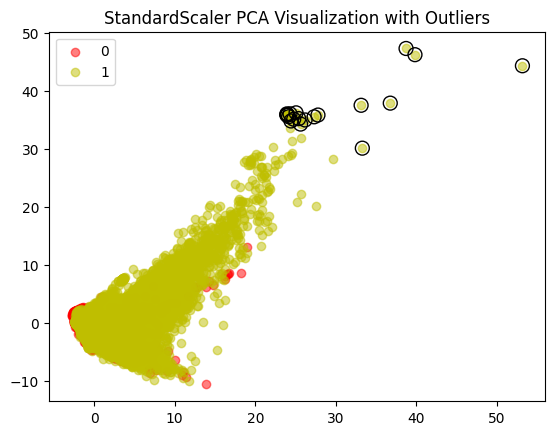

In [ ]:
dim = 2
new_data_2 = ss_pca_patent[:, 0:dim]
new_data_2_norm = np.zeros(len(new_data_2))

for i in range(len(new_data_2)):
  new_data_2_norm[i] = new_data_2[i, 0]**2 * new_data_2[i, 1] **2
sorted_new_data_2_norm = -np.sort(-new_data_2_norm)
norm_idx = np.argsort(-new_data_2_norm)

top_rank_num = 20
pca_ranked_idx = norm_idx[0:top_rank_num]

for i in range(len(zero_idx)):
  plt.scatter(ss_pca_patent[zero_idx[i], 0], ss_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(ss_pca_patent[one_idx[i], 0], ss_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(ss_pca_patent)):
  if i in pca_ranked_idx:
      plt.scatter(ss_pca_patent[i,0], ss_pca_patent[i,1], marker = 'o', facecolors = 'none', edgecolor = 'black', s = 100)

plt.legend(labels = [0, 1])
plt.title("StandardScaler PCA Visualization with Outliers")

In [ ]:
ss_PCA_outliers = []
print("Top 20 Outlier Patents under StandardScaler PCA\n")
for i in range(len(patents)):
  if i in pca_ranked_idx:
    ss_PCA_outliers.append(patents['Patent_Num'][i])
    print(patents['Patent_Num'][i])

Top 20 Outlier Patents under StandardScaler PCA

CN201480072338.6
CN201810199442.1
CN201480027029.7
CN201480015173.9
CN201480027252.1
CN201480015050.5
CN201480015830.X
CN201480014936.8
CN201480027514.4
CN201480015006.4
CN201410538631.9
CN201380038920.6
CN200910165732.5
CN201310191210.9
CN201380015419.8
CN201380018571.1
CN201410535091.9
CN200480018399.0
CN201510354965.5
CN201310485274.X


### MinMaxScaler PCA Patent

Text(0.5, 1.0, 'MinMaxScaler PCA Visualization')

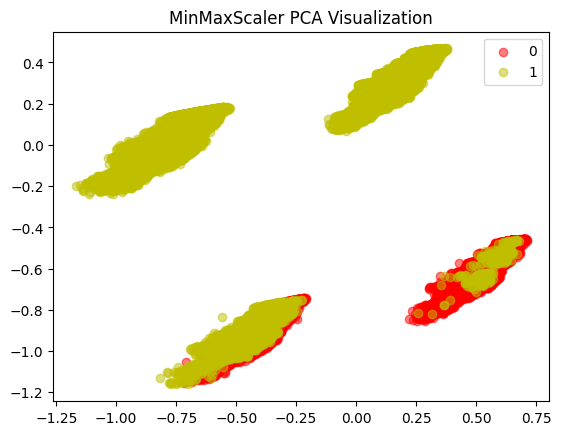

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(mm_pca_patent[zero_idx[i], 0], mm_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(mm_pca_patent[one_idx[i], 0], mm_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MinMaxScaler PCA Visualization")

Plot outliers

Text(0.5, 1.0, 'MinMaxScaler PCA Visualization with Outliers')

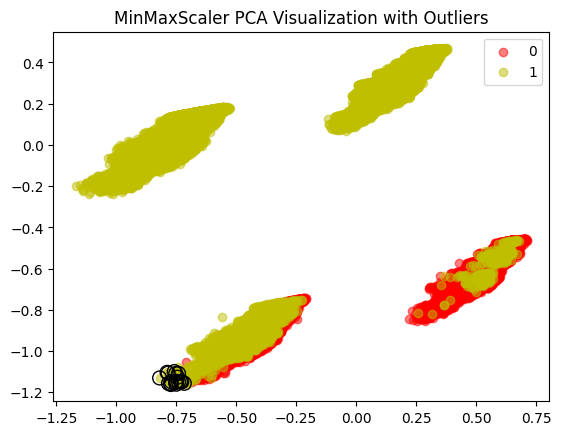

In [ ]:
dim = 2
new_data_2 = mm_pca_patent[:, 0:dim]
new_data_2_norm = np.zeros(len(new_data_2))

for i in range(len(new_data_2)):
  new_data_2_norm[i] = new_data_2[i, 0]**2 * new_data_2[i, 1] **2
sorted_new_data_2_norm = -np.sort(-new_data_2_norm)
norm_idx = np.argsort(-new_data_2_norm)

top_rank_num = 20
pca_ranked_idx = norm_idx[0:top_rank_num]

for i in range(len(zero_idx)):
  plt.scatter(mm_pca_patent[zero_idx[i], 0], mm_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(mm_pca_patent[one_idx[i], 0], mm_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(mm_pca_patent)):
  if i in pca_ranked_idx:
      plt.scatter(mm_pca_patent[i,0], mm_pca_patent[i,1], marker = 'o', facecolors = 'none', edgecolor = 'black', s = 100)

plt.legend(labels = [0, 1])
plt.title("MinMaxScaler PCA Visualization with Outliers")

In [ ]:
mm_PCA_outliers = []
print("Top 20 Outlier Patents under MinMaxScaler PCA\n")
for i in range(len(patents)):
  if i in pca_ranked_idx:
    mm_PCA_outliers.append(patents['Patent_Num'][i])
    print(patents['Patent_Num'][i])

Top 20 Outlier Patents under MinMaxScaler PCA

CN200880015118.4
CN200580016804.X
CN201080042656.X
CN200780011193.9
CN201480070912.4
CN200880111180.3
CN201080039338.8
CN201380042832.3
CN201480036206.8
CN201380049952.6
CN201310741621.0
CN200780022113.X
CN201380033472.0
CN200780033971.4
CN201510437332.0
CN200980134226.8
CN200880106337.3
CN200680045545.8
CN201280011851.5
CN201780003618.5


### MaxAbsScaler PCA Patent

Text(0.5, 1.0, 'MaxAbsScaler PCA Visualization')

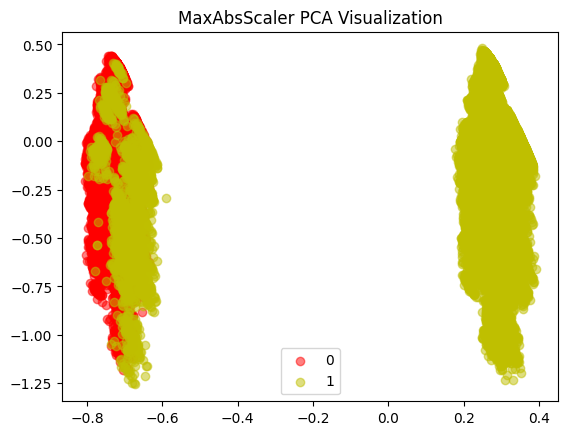

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(abs_pca_patent[zero_idx[i], 0], abs_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(abs_pca_patent[one_idx[i], 0], abs_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MaxAbsScaler PCA Visualization")

Plot outliers

Text(0.5, 1.0, 'MaxAbsScaler PCA Visualization with Outliers')

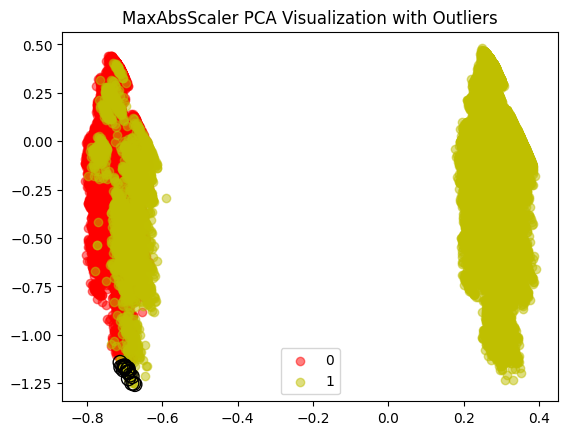

In [ ]:
dim = 2
new_data_2 = abs_pca_patent[:, 0:dim]
new_data_2_norm = np.zeros(len(new_data_2))

for i in range(len(new_data_2)):
  new_data_2_norm[i] = new_data_2[i, 0]**2 * new_data_2[i, 1] **2
sorted_new_data_2_norm = -np.sort(-new_data_2_norm)
norm_idx = np.argsort(-new_data_2_norm)

top_rank_num = 20
pca_ranked_idx = norm_idx[0:top_rank_num]

for i in range(len(zero_idx)):
  plt.scatter(abs_pca_patent[zero_idx[i], 0], abs_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(abs_pca_patent[one_idx[i], 0], abs_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(abs_pca_patent)):
  if i in pca_ranked_idx:
      plt.scatter(abs_pca_patent[i,0], abs_pca_patent[i,1], marker = 'o', facecolors = 'none', edgecolor = 'black', s = 100)

plt.legend(labels = [0, 1])
plt.title("MaxAbsScaler PCA Visualization with Outliers")

In [ ]:
abs_PCA_outliers = []
print("Top 20 Outlier Patents under MaxAbsScaler PCA\n")
for i in range(len(patents)):
  if i in pca_ranked_idx:
    abs_PCA_outliers.append(patents['Patent_Num'][i])
    print(patents['Patent_Num'][i])

Top 20 Outlier Patents under MaxAbsScaler PCA

CN201080042656.X
CN201480070912.4
CN201080039338.8
CN201380042832.3
CN201510971332.9
CN201780057565.5
CN201480036206.8
CN201380049952.6
CN202010491378.1
CN201380033472.0
CN201510437332.0
CN200880106337.3
CN200810058968.4
CN201280011851.5
CN201410646659.4
CN200910099951.8
CN201780003618.5
CN201010160080.9
CN200810058969.9
CN201810149949.6


### RobustScaler PCA Patent

Text(0.5, 1.0, 'RobustScaler PCA Visualization')

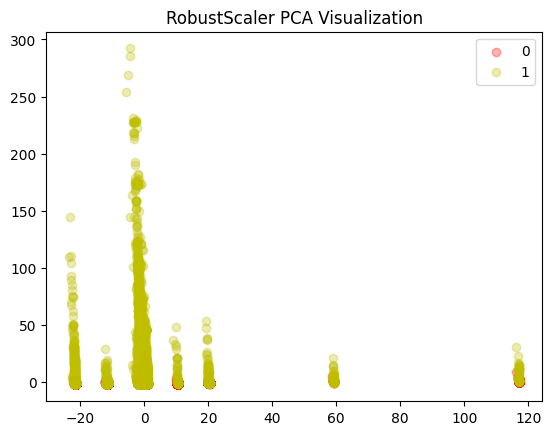

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(rob_pca_patent[zero_idx[i], 0], rob_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.3)
for i in range(len(one_idx)):
  plt.scatter(rob_pca_patent[one_idx[i], 0], rob_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.3)

plt.legend(labels = [0, 1])
plt.title("RobustScaler PCA Visualization")

Plot Outliers

Text(0.5, 1.0, 'RobustScaler PCA Visualization')

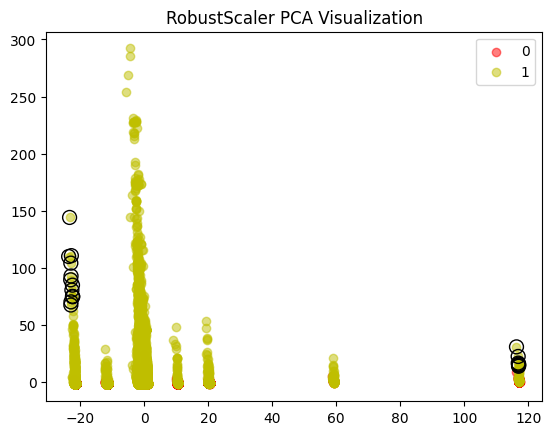

In [ ]:
dim = 2
new_data_2 = rob_pca_patent[:, 0:dim]
new_data_2_norm = np.zeros(len(new_data_2))

for i in range(len(new_data_2)):
  new_data_2_norm[i] = new_data_2[i, 0]**2 * new_data_2[i, 1] **2
sorted_new_data_2_norm = -np.sort(-new_data_2_norm)
norm_idx = np.argsort(-new_data_2_norm)

top_rank_num = 20
pca_ranked_idx = norm_idx[0:top_rank_num]

for i in range(len(zero_idx)):
  plt.scatter(rob_pca_patent[zero_idx[i], 0], rob_pca_patent[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(rob_pca_patent[one_idx[i], 0], rob_pca_patent[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)
for i in range(len(rob_pca_patent)):
  if i in pca_ranked_idx:
      plt.scatter(rob_pca_patent[i,0], rob_pca_patent[i,1], marker = 'o', facecolors = 'none', edgecolor = 'black', s = 100)

plt.legend(labels = [0, 1])
plt.title("RobustScaler PCA Visualization")

In [ ]:
rob_PCA_outliers = []
print("Top 20 Outlier Patents under RobustScaler PCA\n")
for i in range(len(patents)):
  if i in pca_ranked_idx:
    rob_PCA_outliers.append(patents['Patent_Num'][i])
    print(patents['Patent_Num'][i])

Top 20 Outlier Patents under RobustScaler PCA

CN201180038475.4
CN201280019742.8
CN201280019719.9
CN201380042832.3
CN201510587176.6
CN201380033472.0
CN201480067513.2
CN201310289276.1
CN201680044119.6
CN200680027513.5
CN201510857766.6
CN201810166576.3
CN201580056857.8
CN201080047090.X
CN201880083291.1
CN200680050152.6
CN201880065058.0
CN201380049459.4
CN201280019765.9
CN200480019411.X


## t-SNE / UMAP with KMeans Patent

### Sampling

In [ ]:
patent_sample_idx = np.random.choice(patents_2.index, size = 7500)
patent_sample_list = []
patent_sample_target = []
for idx in patent_sample_idx:
  patent_sample_list.append(patents_2.loc[idx].to_numpy())
  patent_sample_target.append(pat_target.loc[idx])

In [ ]:
patent_sample_target_arr = np.array(patent_sample_target)
patent_sample_df = pd.DataFrame(patent_sample_list, columns = patents_2.columns, index = patent_sample_idx)

## t-SNE

In [ ]:
ss_patent_embData, ss_patent_emb, ss_patent_div = doTSNE(patent_sample_df, perplexity = 50, normalization_bit = 1)
mm_patent_embData, mm_patent_emb, mm_patent_div = doTSNE(patent_sample_df, perplexity = 50, normalization_bit = 2)
abs_patent_embData, abs_patent_emb, abs_patent_div = doTSNE(patent_sample_df, perplexity = 50, normalization_bit = 3)
rob_patent_embData, rob_patent_emb, rob_patent_div = doTSNE(patent_sample_df, perplexity = 50, normalization_bit = 4)

In [ ]:
ss_pat_tsne_lab, ss_pat_tsne_km = doKmeans(ss_patent_embData, k = 2)
mm_pat_tsne_lab, mm_pat_tsne_km = doKmeans(mm_patent_embData, k = 2)
abs_pat_tsne_lab, abs_pat_tsne_km = doKmeans(abs_patent_embData, k = 2)
rob_pat_tsne_lab, rob_pat_tsne_km = doKmeans(rob_patent_embData, k = 2)

### StandardScaler t-SNE

In [ ]:
zero_idx = np.where(patent_sample_target_arr == 0)
one_idx = np.where(patent_sample_target_arr == 1)

Text(0.5, 1.0, 'StandardScaler t-SNE Visualization')

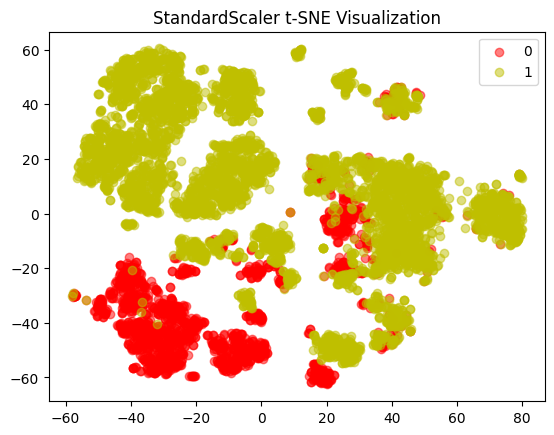

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(ss_patent_embData[zero_idx[i], 0], ss_patent_embData[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(ss_patent_embData[one_idx[i], 0], ss_patent_embData[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("StandardScaler t-SNE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for t-SNE StandardScaler')

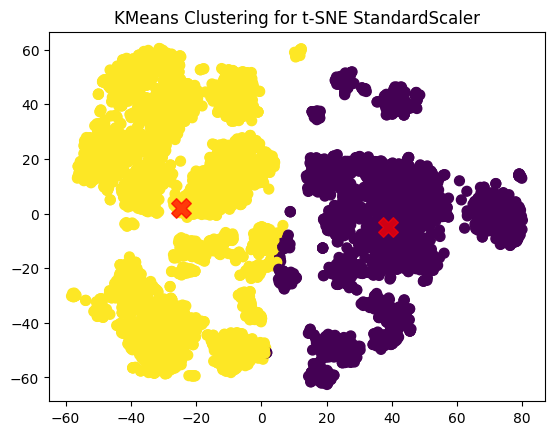

In [ ]:
labels = ss_pat_tsne_lab
centers = ss_pat_tsne_km.cluster_centers_

plt.scatter(ss_patent_embData[:, 0], ss_patent_embData[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for t-SNE StandardScaler')

In [ ]:
model_metrics(patent_sample_target_arr, ss_pat_tsne_lab, ss_pat_tsne_km, ss_patent_embData)

Accuracy is 0.469067
Sensitivity is 0.538974
Specificity is 0.269409
Precision is 0.678143
Negative Prediction Ratio is 0.169854
F1-Score is 0.600602
Diagnostic Index is 1.044639
F1-Micro Score is 0.469067
F1-Macro Score is 0.404476
Balanced Accuracy Score is 0.404191
Mutual Information Score is 0.015096
Adjusted Mutual Information Score is 0.024055


### MinMaxScaler t-SNE

Text(0.5, 1.0, 'MinMaxScaler t-SNE Visualization')

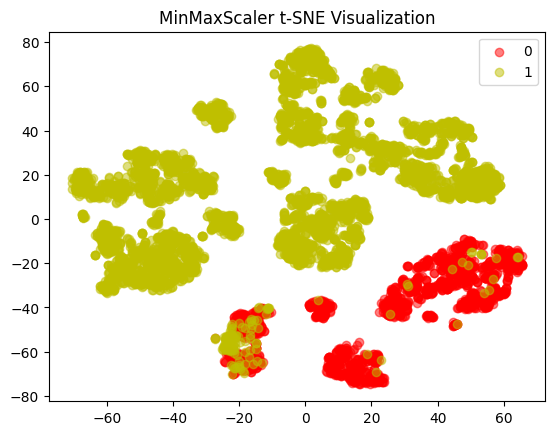

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(mm_patent_embData[zero_idx[i], 0], mm_patent_embData[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(mm_patent_embData[one_idx[i], 0], mm_patent_embData[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MinMaxScaler t-SNE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for t-SNE MinMaxScaler')

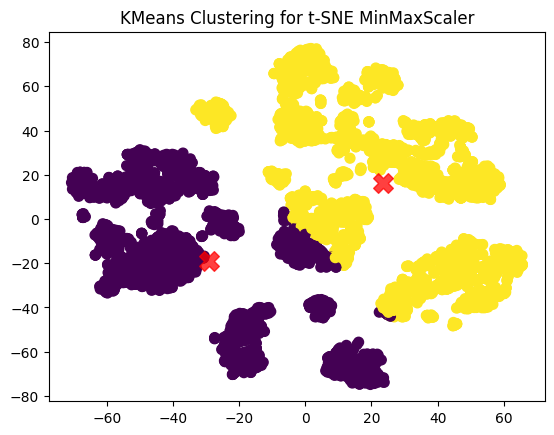

In [ ]:
labels = mm_pat_tsne_lab
centers = mm_pat_tsne_km.cluster_centers_

plt.scatter(mm_patent_embData[:, 0], mm_patent_embData[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for t-SNE MinMaxScaler')

In [ ]:
model_metrics(patent_sample_target_arr, mm_pat_tsne_lab, mm_pat_tsne_km, mm_patent_embData)

Accuracy is 0.525333
Sensitivity is 0.550135
Specificity is 0.454499
Precision is 0.742288
Negative Prediction Ratio is 0.261307
F1-Score is 0.631927
Diagnostic Index is 1.196314
F1-Micro Score is 0.525333
F1-Macro Score is 0.481880
Balanced Accuracy Score is 0.502317
Mutual Information Score is 0.000008
Adjusted Mutual Information Score is -0.000093


### MaxAbsScaler t-SNE

Text(0.5, 1.0, 'MaxAbsScaler t-SNE Visualization')

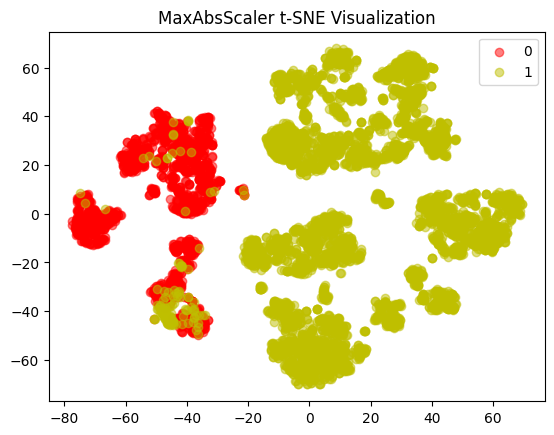

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(abs_patent_embData[zero_idx[i], 0], abs_patent_embData[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(abs_patent_embData[one_idx[i], 0], abs_patent_embData[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MaxAbsScaler t-SNE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for t-SNE MaxAbsScaler')

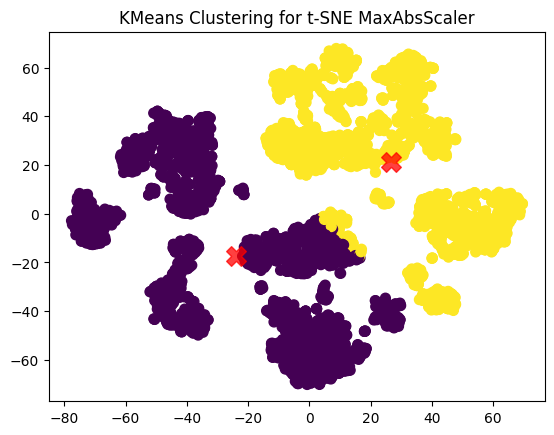

In [ ]:
labels = abs_pat_tsne_lab
centers = abs_pat_tsne_km.cluster_centers_

plt.scatter(abs_patent_embData[:, 0], abs_patent_embData[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for t-SNE MaxAbsScaler')

In [ ]:
model_metrics(patent_sample_target_arr, abs_pat_tsne_lab, abs_pat_tsne_km, abs_patent_embData)

Accuracy is 0.722667
Sensitivity is 0.625563
Specificity is 1.000000
Precision is 1.000000
Negative Prediction Ratio is 0.483230
F1-Score is 0.769657
Diagnostic Index is 1.642848
F1-Micro Score is 0.722667
F1-Macro Score is 0.710624
Balanced Accuracy Score is 0.812781
Mutual Information Score is 0.200671
Adjusted Mutual Information Score is 0.317744


### RobustScaler t-SNE

Text(0.5, 1.0, 'RobustScaler t-SNE Visualization')

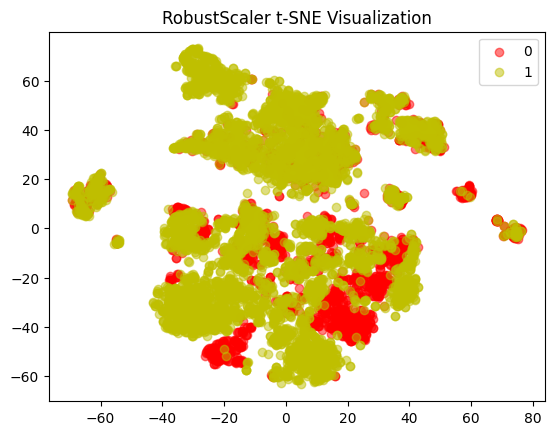

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(rob_patent_embData[zero_idx[i], 0], rob_patent_embData[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(rob_patent_embData[one_idx[i], 0], rob_patent_embData[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("RobustScaler t-SNE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for t-SNE RobustScaler')

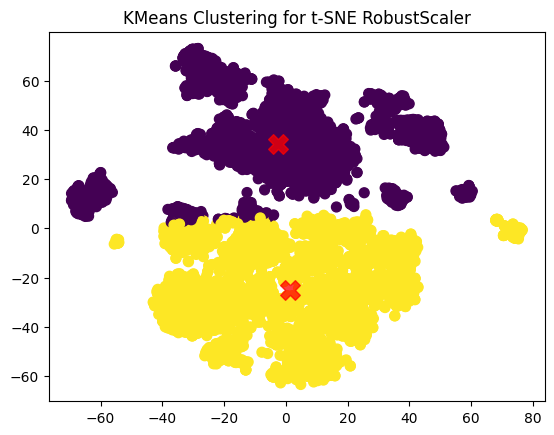

In [ ]:
labels = rob_pat_tsne_lab
centers = rob_pat_tsne_km.cluster_centers_

plt.scatter(rob_patent_embData[:, 0], rob_patent_embData[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for t-SNE RobustScaler')

In [ ]:
model_metrics(patent_sample_target_arr, rob_pat_tsne_lab, rob_pat_tsne_km, rob_patent_embData)

Accuracy is 0.472800
Sensitivity is 0.519532
Specificity is 0.339332
Precision is 0.691920
Negative Prediction Ratio is 0.198258
F1-Score is 0.593461
Diagnostic Index is 1.074003
F1-Micro Score is 0.472800
F1-Macro Score is 0.421873
Balanced Accuracy Score is 0.429432
Mutual Information Score is 0.007880
Adjusted Mutual Information Score is 0.012411


## UMAP

In [ ]:
ss_patent_embedding = doUMAP(patent_sample_df, neighbor_size = 50, init = 'spectral', normalization_bit = 1)
mm_patent_embedding = doUMAP(patent_sample_df, neighbor_size = 50, init = 'spectral', normalization_bit = 2)
abs_patent_embedding = doUMAP(patent_sample_df, neighbor_size = 50, init = 'spectral', normalization_bit = 3)
rob_patent_embedding = doUMAP(patent_sample_df, neighbor_size = 50, init = 'spectral', normalization_bit = 4)

In [ ]:
ss_pat_umap_lab, ss_pat_umap_km = doKmeans(ss_patent_embedding, k = 2)
mm_pat_umap_lab, mm_pat_umap_km = doKmeans(mm_patent_embedding, k = 2)
abs_pat_umap_lab, abs_pat_umap_km = doKmeans(abs_patent_embedding, k = 2)
rob_pat_umap_lab, rob_pat_umap_km = doKmeans(rob_patent_embedding, k = 2)

### StandardScaler UMAP

Text(0.5, 1.0, 'StandardScaler UMAP Visualization')

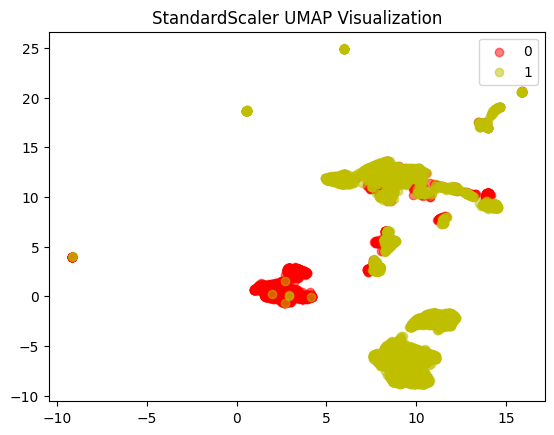

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(ss_patent_embedding[zero_idx[i], 0], ss_patent_embedding[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(ss_patent_embedding[one_idx[i], 0], ss_patent_embedding[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("StandardScaler UMAP Visualization")

Text(0.5, 1.0, 'KMeans Clustering for UMAP StandardScaler')

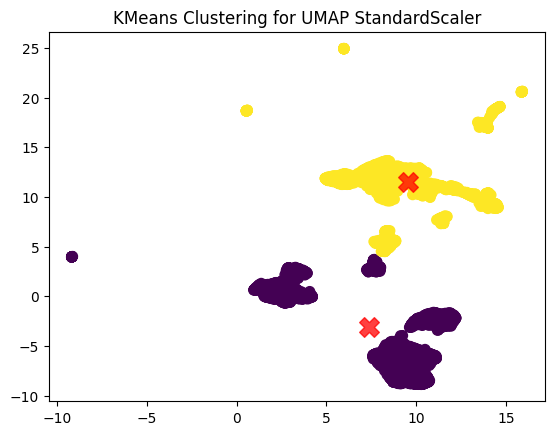

In [ ]:
labels = ss_pat_umap_lab
centers = ss_pat_umap_km.cluster_centers_

plt.scatter(ss_patent_embedding[:, 0], ss_patent_embedding[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for UMAP StandardScaler')

In [ ]:
model_metrics(patent_sample_target_arr, ss_pat_umap_lab, ss_pat_umap_km, ss_patent_embedding)

Accuracy is 0.551467
Sensitivity is 0.506031
Specificity is 0.681234
Precision is 0.819295
Negative Prediction Ratio is 0.325633
F1-Score is 0.625640
Diagnostic Index is 1.305951
F1-Micro Score is 0.551467
F1-Macro Score is 0.533139
Balanced Accuracy Score is 0.593632
Mutual Information Score is 0.013861
Adjusted Mutual Information Score is 0.021866


### MinMaxScaler UMAP

Text(0.5, 1.0, 'MinMaxScaler UMAP Visualization')

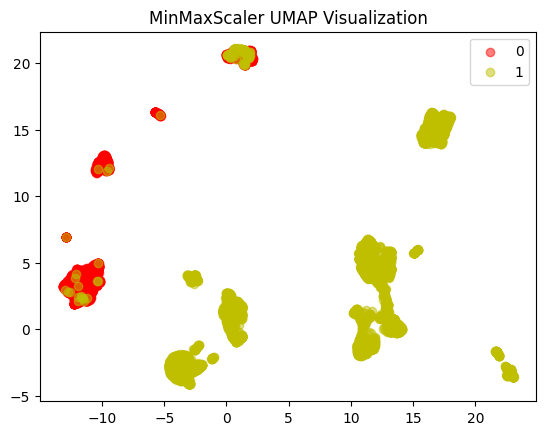

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(mm_patent_embedding[zero_idx[i], 0], mm_patent_embedding[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(mm_patent_embedding[one_idx[i], 0], mm_patent_embedding[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MinMaxScaler UMAP Visualization")

Text(0.5, 1.0, 'KMeans Clustering for UMAP MinMaxScaler')

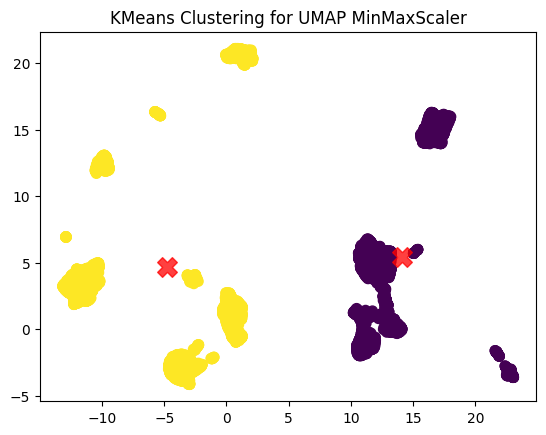

In [ ]:
labels = mm_pat_umap_lab
centers = mm_pat_umap_km.cluster_centers_

plt.scatter(mm_patent_embedding[:, 0], mm_patent_embedding[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for UMAP MinMaxScaler')

In [ ]:
model_metrics(patent_sample_target_arr, mm_pat_umap_lab, mm_pat_umap_km, mm_patent_embedding)

Accuracy is 0.292267
Sensitivity is 0.394599
Specificity is 0.000000
Precision is 0.529853
Negative Prediction Ratio is 0.000000
F1-Score is 0.452332
Diagnostic Index is 0.629688
F1-Micro Score is 0.292267
F1-Macro Score is 0.226166
Balanced Accuracy Score is 0.197300
Mutual Information Score is 0.191002
Adjusted Mutual Information Score is 0.303063


### MaxAbsScaler UMAP

Text(0.5, 1.0, 'MaxAbsScaler UMAP Visualization')

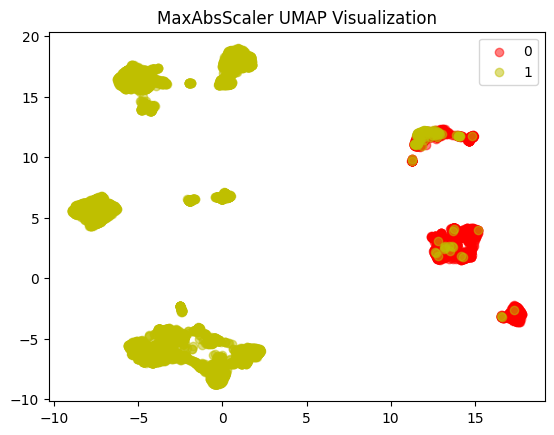

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(abs_patent_embedding[zero_idx[i], 0], abs_patent_embedding[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(abs_patent_embedding[one_idx[i], 0], abs_patent_embedding[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MaxAbsScaler UMAP Visualization")

Text(0.5, 1.0, 'KMeans Clustering for UMAP MaxAbsScaler')

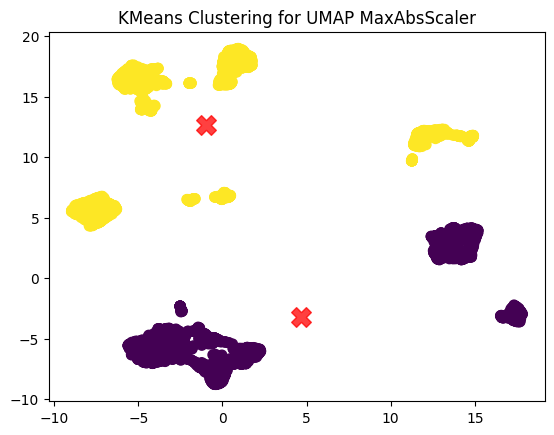

In [ ]:
labels = abs_pat_umap_lab
centers = abs_pat_umap_km.cluster_centers_

plt.scatter(abs_patent_embedding[:, 0], abs_patent_embedding[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for UMAP MaxAbsScaler')

In [ ]:
model_metrics(patent_sample_target_arr, abs_pat_umap_lab, abs_pat_umap_km, abs_patent_embedding)

Accuracy is 0.634133
Sensitivity is 0.601080
Specificity is 0.728535
Precision is 0.863460
Negative Prediction Ratio is 0.390036
F1-Score is 0.708767
Diagnostic Index is 1.443881
F1-Micro Score is 0.634133
F1-Macro Score is 0.608417
Balanced Accuracy Score is 0.664807
Mutual Information Score is 0.042874
Adjusted Mutual Information Score is 0.067686


### RobustScaler UMAP

Text(0.5, 1.0, 'RobustScaler UMAP Visualization')

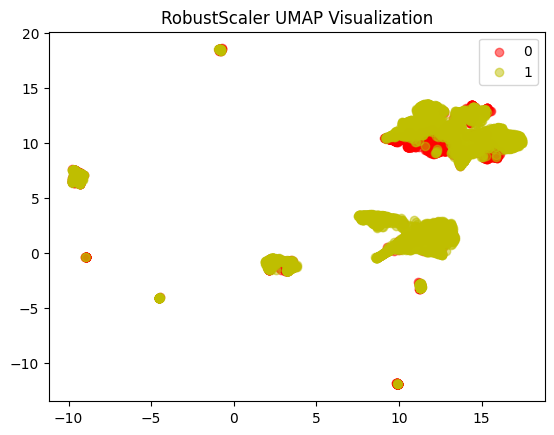

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(rob_patent_embedding[zero_idx[i], 0], rob_patent_embedding[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(rob_patent_embedding[one_idx[i], 0], rob_patent_embedding[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("RobustScaler UMAP Visualization")

Text(0.5, 1.0, 'KMeans Clustering for UMAP RobustScaler')

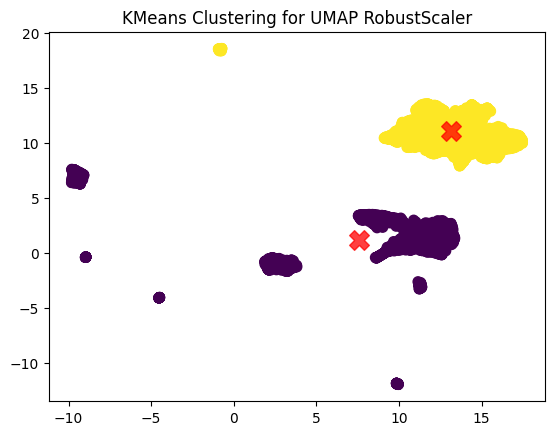

In [ ]:
labels = rob_pat_umap_lab
centers = rob_pat_umap_km.cluster_centers_

plt.scatter(rob_patent_embedding[:, 0], rob_patent_embedding[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for UMAP RobustScaler')

In [ ]:
model_metrics(patent_sample_target_arr, rob_pat_umap_lab, rob_pat_umap_km, rob_patent_embedding)

Accuracy is 0.485467
Sensitivity is 0.540954
Specificity is 0.326992
Precision is 0.696569
Negative Prediction Ratio is 0.199623
F1-Score is 0.608978
Diagnostic Index is 1.090934
F1-Micro Score is 0.485467
F1-Macro Score is 0.428441
Balanced Accuracy Score is 0.433973
Mutual Information Score is 0.006984
Adjusted Mutual Information Score is 0.011033


## PHATE

In [ ]:
ss_pat_phate = doPHATE(patent_sample_df, 1)
mm_pat_phate = doPHATE(patent_sample_df, 2)
abs_pat_phate = doPHATE(patent_sample_df, 3)
rob_pat_phate = doPHATE(patent_sample_df, 4)

Calculating PHATE...
  Running PHATE on 7500 observations and 31 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.48 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 3.55 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.91 seconds.
    Calculating KMeans...
    Calculated KMeans in 14.92 seconds.
  Calculated landmark operator in 17.01 seconds.
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 5.97 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.34 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.02 seconds.
Calculated PHATE in 37.93 seconds.
Calculating PHATE...
  Running PHATE on 7500 observations and 31 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN se

In [ ]:
ss_pat_phate_lab, ss_pat_phate_km = doKmeans(ss_pat_phate, k = 2)
mm_pat_phate_lab, mm_pat_phate_km = doKmeans(mm_pat_phate, k = 2)
abs_pat_phate_lab, abs_pat_phate_km = doKmeans(abs_pat_phate, k = 2)
rob_pat_phate_lab, rob_pat_phate_km = doKmeans(rob_pat_phate, k = 2)

### StandardScaler PHATE

Text(0.5, 1.0, 'StandardScaler PHATE Visualization')

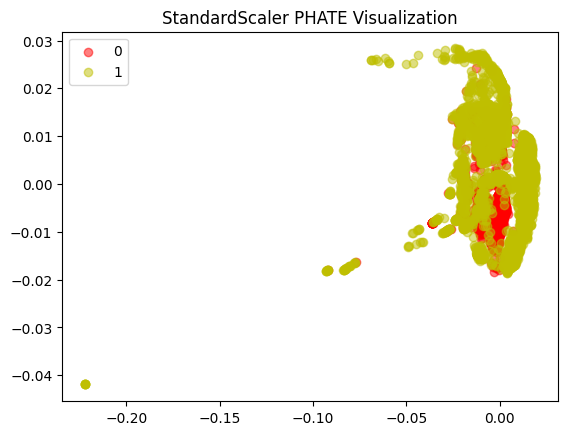

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(ss_pat_phate[zero_idx[i], 0], ss_pat_phate[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(ss_pat_phate[one_idx[i], 0], ss_pat_phate[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("StandardScaler PHATE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for PHATE StandardScaler')

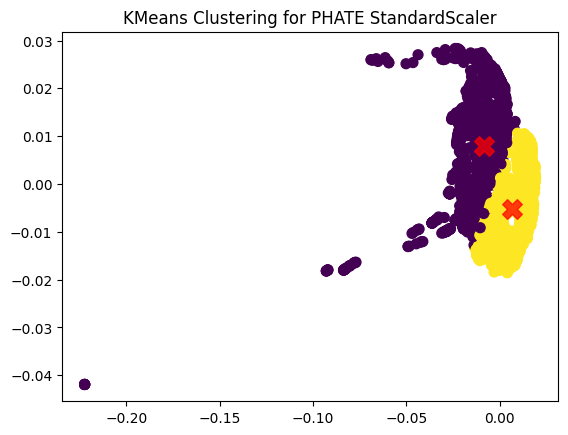

In [ ]:
labels = ss_pat_phate_lab
centers = ss_pat_phate_km.cluster_centers_

plt.scatter(ss_pat_phate[:, 0], ss_pat_phate[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for PHATE StandardScaler')

In [ ]:
model_metrics(patent_sample_target_arr, ss_pat_phate_lab, ss_pat_phate_km, ss_pat_phate)

Accuracy is 0.474667
Sensitivity is 0.530333
Specificity is 0.315681
Precision is 0.688801
Negative Prediction Ratio is 0.190506
F1-Score is 0.599268
Diagnostic Index is 1.069332
F1-Micro Score is 0.474667
F1-Macro Score is 0.418442
Balanced Accuracy Score is 0.423007
Mutual Information Score is 0.009500
Adjusted Mutual Information Score is 0.015027


### MinMaxScaler PHATE

Text(0.5, 1.0, 'MinMaxScaler PHATE Visualization')

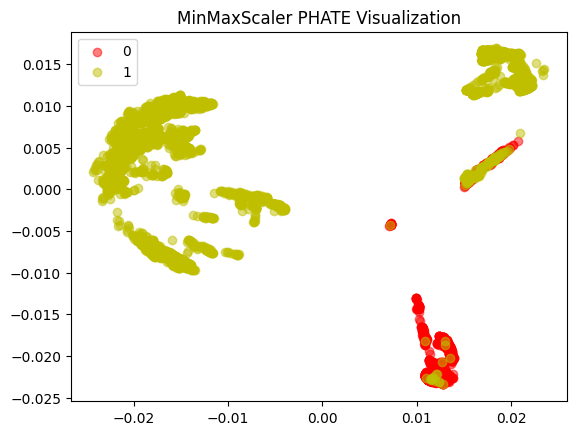

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(mm_pat_phate[zero_idx[i], 0], mm_pat_phate[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(mm_pat_phate[one_idx[i], 0], mm_pat_phate[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MinMaxScaler PHATE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for PHATE MinMaxScaler')

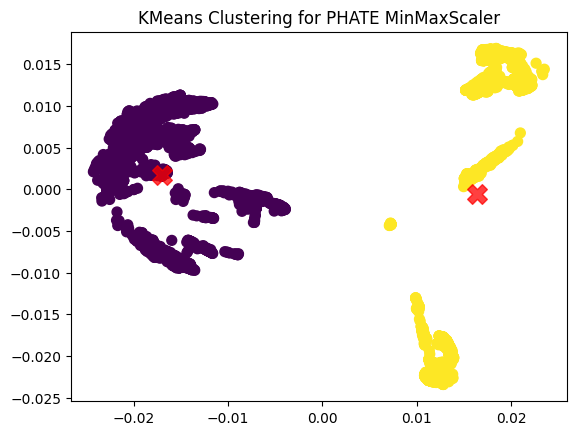

In [ ]:
labels = mm_pat_phate_lab
centers = mm_pat_phate_km.cluster_centers_

plt.scatter(mm_pat_phate[:, 0], mm_pat_phate[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for PHATE MinMaxScaler')

In [ ]:
model_metrics(patent_sample_target_arr, mm_pat_phate_lab, mm_pat_phate_km, mm_pat_phate)

Accuracy is 0.292267
Sensitivity is 0.394599
Specificity is 0.000000
Precision is 0.529853
Negative Prediction Ratio is 0.000000
F1-Score is 0.452332
Diagnostic Index is 0.629688
F1-Micro Score is 0.292267
F1-Macro Score is 0.226166
Balanced Accuracy Score is 0.197300
Mutual Information Score is 0.191002
Adjusted Mutual Information Score is 0.303063


### MaxAbsScaler PHATE

Text(0.5, 1.0, 'MaxAbsScaler PHATE Visualization')

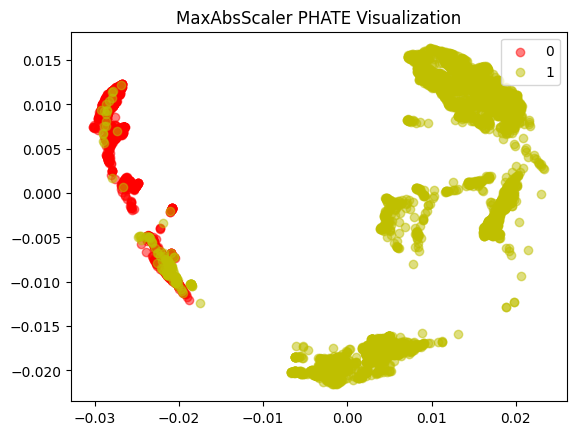

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(abs_pat_phate[zero_idx[i], 0], abs_pat_phate[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(abs_pat_phate[one_idx[i], 0], abs_pat_phate[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MaxAbsScaler PHATE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for PHATE MaxAbsScaler')

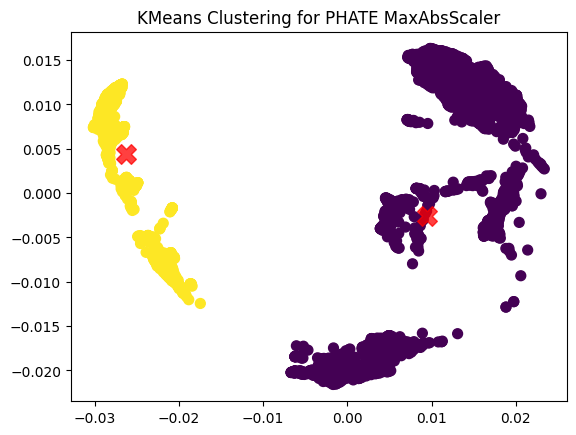

In [ ]:
labels = abs_pat_phate_lab
centers = abs_pat_phate_km.cluster_centers_

plt.scatter(abs_pat_phate[:, 0], abs_pat_phate[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for PHATE MaxAbsScaler')

In [ ]:
model_metrics(patent_sample_target_arr, abs_pat_phate_lab, abs_pat_phate_km, abs_pat_phate)

Accuracy is 0.021467
Sensitivity is 0.028983
Specificity is 0.000000
Precision is 0.076448
Negative Prediction Ratio is 0.000000
F1-Score is 0.042031
Diagnostic Index is 0.051399
F1-Micro Score is 0.021467
F1-Macro Score is 0.021016
Balanced Accuracy Score is 0.014491
Mutual Information Score is 0.496540
Adjusted Mutual Information Score is 0.851634


### RobustScaler PHATE

Text(0.5, 1.0, 'RobustScaler PHATE Visualization')

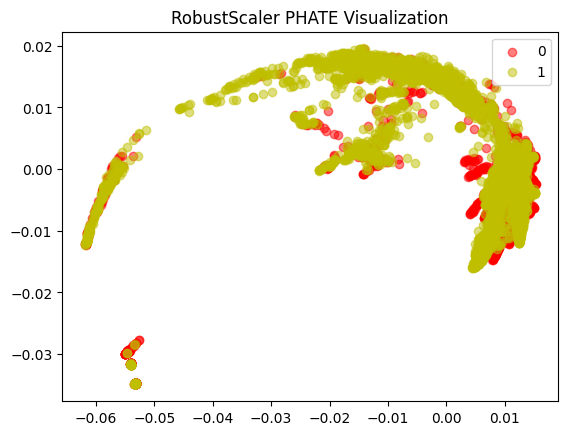

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(rob_pat_phate[zero_idx[i], 0], rob_pat_phate[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(rob_pat_phate[one_idx[i], 0], rob_pat_phate[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("RobustScaler PHATE Visualization")

Text(0.5, 1.0, 'KMeans Clustering for PHATE RobustScaler')

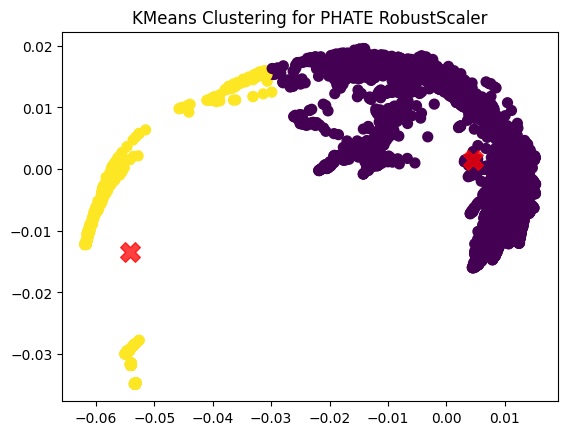

In [ ]:
labels = rob_pat_phate_lab
centers = rob_pat_phate_km.cluster_centers_

plt.scatter(rob_pat_phate[:, 0], rob_pat_phate[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.title('KMeans Clustering for PHATE RobustScaler')

In [ ]:
model_metrics(patent_sample_target_arr, rob_pat_phate_lab, rob_pat_phate_km, rob_pat_phate)

Accuracy is 0.262400
Sensitivity is 0.054365
Specificity is 0.856555
Precision is 0.519793
Negative Prediction Ratio is 0.240786
F1-Score is 0.098435
Diagnostic Index is 0.877645
F1-Micro Score is 0.262400
F1-Macro Score is 0.237169
Balanced Accuracy Score is 0.455460
Mutual Information Score is 0.009499
Adjusted Mutual Information Score is 0.022332


## Stacked PCA t-SNE SVM

In [ ]:
# To do PCA with 90% explained variance, we can't use our doPCA function
ss_pat_data = StandardScaler().fit_transform(patent_sample_df)
mm_pat_data = MinMaxScaler().fit_transform(patent_sample_df)
abs_pat_data = MaxAbsScaler().fit_transform(patent_sample_df)
rob_pat_data = RobustScaler().fit_transform(patent_sample_df)

In [ ]:
pca = PCA(n_components = 0.90)
ss_new_pat = pca.fit_transform(ss_pat_data)
mm_new_pat = pca.fit_transform(mm_pat_data)
abs_new_pat = pca.fit_transform(abs_pat_data)
rob_new_pat = pca.fit_transform(rob_pat_data)

In [ ]:
tsne = TSNE(n_components = 2, perplexity = 30, init = 'pca', random_state = 0)
ss_new_pat_tsne = tsne.fit_transform(ss_new_pat)
mm_new_pat_tsne = tsne.fit_transform(mm_new_pat)
abs_new_pat_tsne = tsne.fit_transform(abs_new_pat)
rob_new_pat_tsne = tsne.fit_transform(rob_new_pat)

In [ ]:
ss_pat_train, ss_pat_test, ss_p_target_train, ss_p_target_test = train_test_split(ss_new_pat_tsne, patent_sample_target_arr, test_size = 0.2, random_state = 0)
mm_pat_train, mm_pat_test, mm_p_target_train, mm_p_target_test = train_test_split(mm_new_pat_tsne, patent_sample_target_arr, test_size = 0.2, random_state = 0)
abs_pat_train, abs_pat_test, abs_p_target_train, abs_p_target_test = train_test_split(abs_new_pat_tsne, patent_sample_target_arr, test_size = 0.2, random_state = 0)
rob_pat_train, rob_pat_test, rob_p_target_train, rob_p_target_test = train_test_split(rob_new_pat_tsne, patent_sample_target_arr, test_size = 0.2, random_state = 0)

In [ ]:
ss_c = svm.SVC().fit(ss_pat_train, ss_p_target_train)
mm_c = svm.SVC().fit(mm_pat_train, mm_p_target_train)
abs_c = svm.SVC().fit(abs_pat_train, abs_p_target_train)
rob_c = svm.SVC().fit(rob_pat_train, rob_p_target_train)

ss_pred = ss_c.predict(ss_pat_test)
mm_pred = mm_c.predict(mm_pat_test)
abs_pred = abs_c.predict(abs_pat_test)
rob_pred = rob_c.predict(rob_pat_test)

PCA t-SNE

### StandardScaler stacked PCA t-SNE

Text(0.5, 1.0, 'StandardScaler PCA t-SNE Visualization')

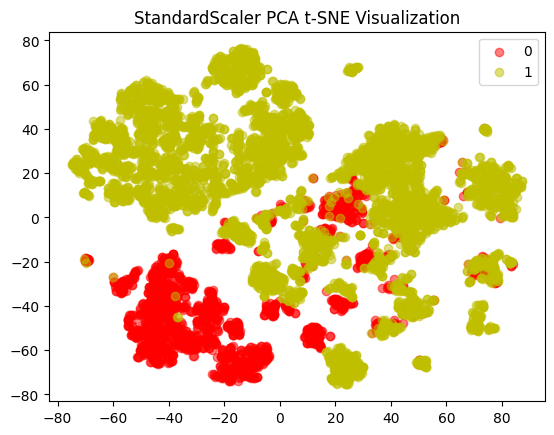

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(ss_new_pat_tsne[zero_idx[i], 0], ss_new_pat_tsne[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(ss_new_pat_tsne[one_idx[i], 0], ss_new_pat_tsne[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("StandardScaler PCA t-SNE Visualization")

Text(0.5, 1.0, 'StandardScaler Stacked t-SNE / PCA under SVM with Vectors')

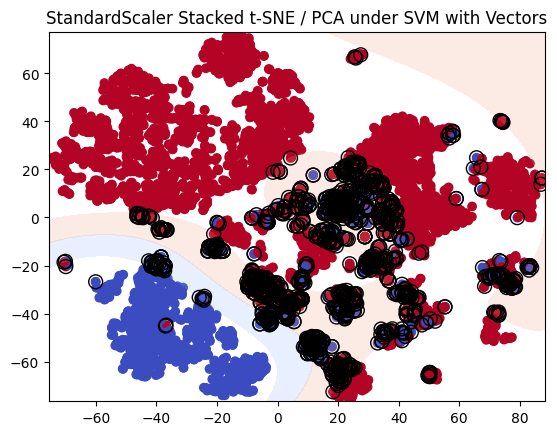

In [ ]:
plt.scatter(ss_pat_train[:, 0], ss_pat_train[:, 1], c = ss_p_target_train, cmap = 'coolwarm')

x2, y2 = np.meshgrid(np.linspace(ss_pat_train[:, 0].min() - 1, ss_pat_train[:, 0].max() + 1, 100),
                     np.linspace(ss_pat_train[:, 1].min() - 1, ss_pat_train[:, 1].max() + 1, 100))
Z = ss_c.decision_function(np.c_[x2.ravel(), y2.ravel()])
Z = Z.reshape(x2.shape)

plt.contourf(x2, y2, Z, levels = [-1, 0, 1], alpha = 0.2, cmap = 'coolwarm')
plt.scatter(ss_c.support_vectors_[:, 0], ss_c.support_vectors_[:, 1],
            facecolors = 'none', s = 100, edgecolors = 'k')

plt.title("StandardScaler Stacked t-SNE / PCA under SVM with Vectors")

- Black dots are support vectors
- Blue dots are label 0
- Red dots are label 1

In [ ]:
model_metrics(ss_p_target_test, ss_pred, ss_c, ss_pat_test)

Accuracy is 0.910667
Sensitivity is 0.999083
Specificity is 0.674817
Precision is 0.891251
Negative Prediction Ratio is 0.996390
F1-Score is 0.942092
Diagnostic Index is 1.811388
F1-Micro Score is 0.910667
F1-Macro Score is 0.873378
Balanced Accuracy Score is 0.836950
Mutual Information Score is 0.301092
Adjusted Mutual Information Score is 0.565535


### MinMaxScaler stacked PCA t-SNE

Text(0.5, 1.0, 'MinMaxScaler PCA t-SNE Visualization')

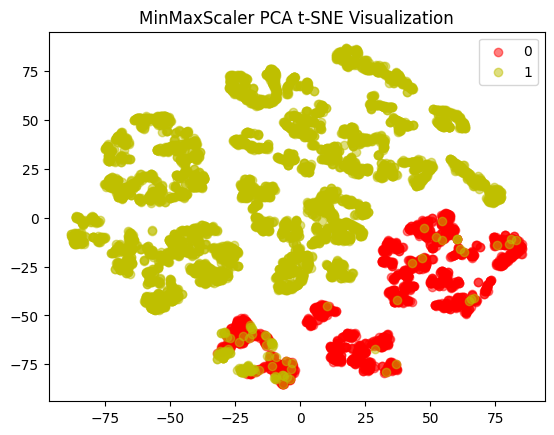

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(mm_new_pat_tsne[zero_idx[i], 0], mm_new_pat_tsne[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(mm_new_pat_tsne[one_idx[i], 0], mm_new_pat_tsne[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MinMaxScaler PCA t-SNE Visualization")

Text(0.5, 1.0, 'MinMaxScaler Stacked t-SNE / PCA under SVM with Vectors')

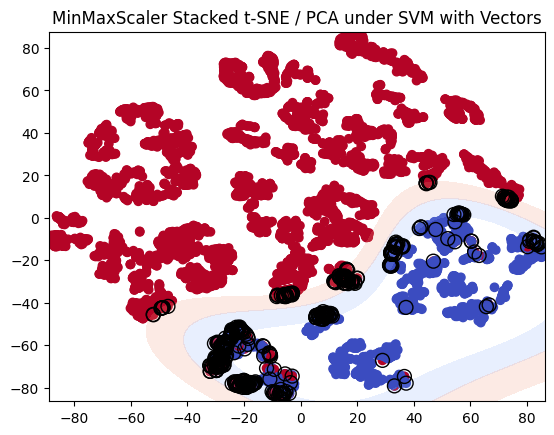

In [ ]:
plt.scatter(mm_pat_train[:, 0], mm_pat_train[:, 1], c = mm_p_target_train, cmap = 'coolwarm')

x2, y2 = np.meshgrid(np.linspace(mm_pat_train[:, 0].min() - 1, mm_pat_train[:, 0].max() + 1, 100),
                     np.linspace(mm_pat_train[:, 1].min() - 1, mm_pat_train[:, 1].max() + 1, 100))
Z = mm_c.decision_function(np.c_[x2.ravel(), y2.ravel()])
Z = Z.reshape(x2.shape)

plt.contourf(x2, y2, Z, levels = [-1, 0, 1], alpha = 0.2, cmap = 'coolwarm')
plt.scatter(mm_c.support_vectors_[:, 0], mm_c.support_vectors_[:, 1],
            facecolors = 'none', s = 100, edgecolors = 'k')

plt.title("MinMaxScaler Stacked t-SNE / PCA under SVM with Vectors")

In [ ]:
model_metrics(mm_p_target_test, mm_pred, mm_c, mm_pat_test)

Accuracy is 0.980667
Sensitivity is 0.973419
Specificity is 1.000000
Precision is 1.000000
Negative Prediction Ratio is 0.933790
F1-Score is 0.986530
Diagnostic Index is 1.976367
F1-Micro Score is 0.980667
F1-Macro Score is 0.976146
Balanced Accuracy Score is 0.986709
Mutual Information Score is 0.514726
Adjusted Mutual Information Score is 0.865137


### MaxAbsScaler stacked PCA t-SNE

Text(0.5, 1.0, 'MaxAbsScaler PCA t-SNE Visualization')

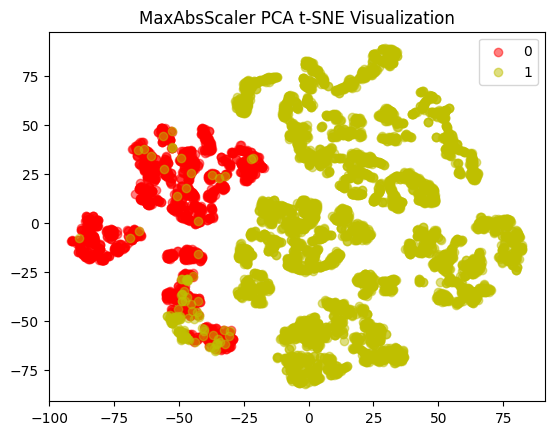

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(abs_new_pat_tsne[zero_idx[i], 0], abs_new_pat_tsne[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(abs_new_pat_tsne[one_idx[i], 0], abs_new_pat_tsne[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("MaxAbsScaler PCA t-SNE Visualization")

Text(0.5, 1.0, 'MaxAbsScaler Stacked t-SNE / PCA under SVM with Vectors')

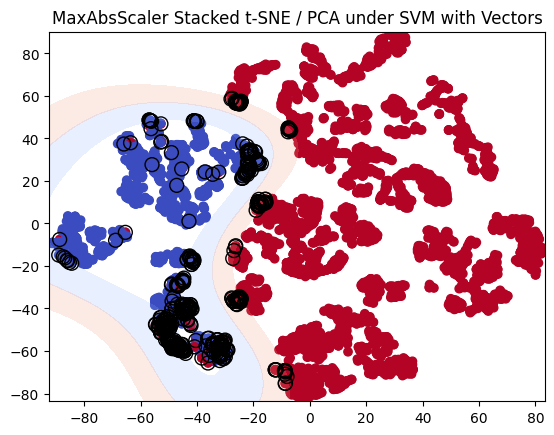

In [ ]:
plt.scatter(abs_pat_train[:, 0], abs_pat_train[:, 1], c = abs_p_target_train, cmap = 'coolwarm')

x2, y2 = np.meshgrid(np.linspace(abs_pat_train[:, 0].min() - 1, abs_pat_train[:, 0].max() + 1, 100),
                     np.linspace(abs_pat_train[:, 1].min() - 1, abs_pat_train[:, 1].max() + 1, 100))
Z = abs_c.decision_function(np.c_[x2.ravel(), y2.ravel()])
Z = Z.reshape(x2.shape)

plt.contourf(x2, y2, Z, levels = [-1, 0, 1], alpha = 0.2, cmap = 'coolwarm')
plt.scatter(abs_c.support_vectors_[:, 0], abs_c.support_vectors_[:, 1],
            facecolors = 'none', s = 100, edgecolors = 'k')

plt.title("MaxAbsScaler Stacked t-SNE / PCA under SVM with Vectors")

In [ ]:
model_metrics(abs_p_target_test, abs_pred, abs_c, abs_pat_test)

Accuracy is 0.980667
Sensitivity is 0.973419
Specificity is 1.000000
Precision is 1.000000
Negative Prediction Ratio is 0.933790
F1-Score is 0.986530
Diagnostic Index is 1.976367
F1-Micro Score is 0.980667
F1-Macro Score is 0.976146
Balanced Accuracy Score is 0.986709
Mutual Information Score is 0.514726
Adjusted Mutual Information Score is 0.865137


### RobustScaler stacked PCA t-SNE

Text(0.5, 1.0, 'RobustScaler PCA t-SNE Visualization')

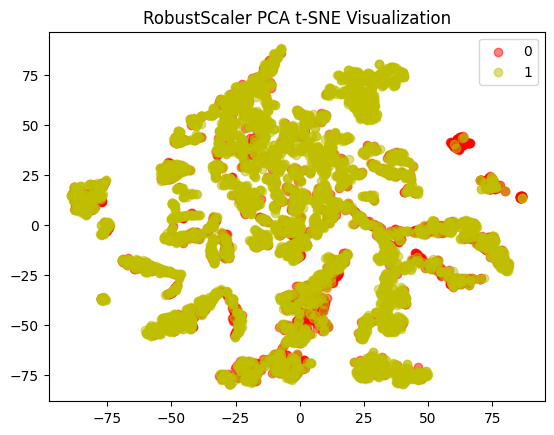

In [ ]:
for i in range(len(zero_idx)):
  plt.scatter(rob_new_pat_tsne[zero_idx[i], 0], rob_new_pat_tsne[zero_idx[i], 1], marker = 'o', c = 'r', alpha = 0.5)
for i in range(len(one_idx)):
  plt.scatter(rob_new_pat_tsne[one_idx[i], 0], rob_new_pat_tsne[one_idx[i], 1], marker = 'o', c = 'y', alpha = 0.5)

plt.legend(labels = [0, 1])
plt.title("RobustScaler PCA t-SNE Visualization")

Text(0.5, 1.0, 'RobustScaler Stacked t-SNE / PCA under SVM with Vectors')

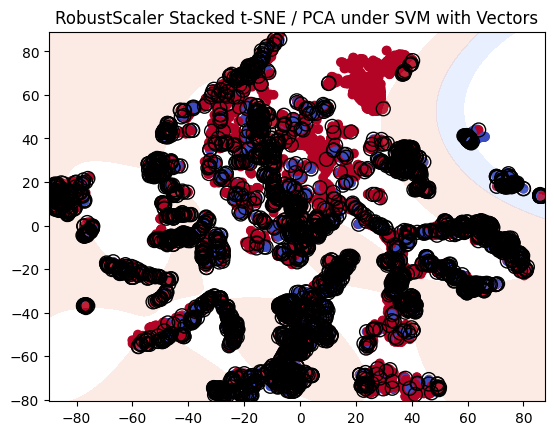

In [ ]:
plt.scatter(rob_pat_train[:, 0], rob_pat_train[:, 1], c = rob_p_target_train, cmap = 'coolwarm')

x2, y2 = np.meshgrid(np.linspace(rob_pat_train[:, 0].min() - 1, rob_pat_train[:, 0].max() + 1, 100),
                     np.linspace(rob_pat_train[:, 1].min() - 1, rob_pat_train[:, 1].max() + 1, 100))
Z = rob_c.decision_function(np.c_[x2.ravel(), y2.ravel()])
Z = Z.reshape(x2.shape)

plt.contourf(x2, y2, Z, levels = [-1, 0, 1], alpha = 0.2, cmap = 'coolwarm')
plt.scatter(rob_c.support_vectors_[:, 0], rob_c.support_vectors_[:, 1],
            facecolors = 'none', s = 100, edgecolors = 'k')

plt.title("RobustScaler Stacked t-SNE / PCA under SVM with Vectors")

In [ ]:
model_metrics(rob_p_target_test, rob_pred, rob_c, rob_pat_test)

Accuracy is 0.739333
Sensitivity is 0.991751
Specificity is 0.066015
Precision is 0.739071
Negative Prediction Ratio is 0.750000
F1-Score is 0.846967
Diagnostic Index is 1.411012
F1-Micro Score is 0.739333
F1-Macro Score is 0.484158
Balanced Accuracy Score is 0.528883
Mutual Information Score is 0.012147
Adjusted Mutual Information Score is 0.033811


#Extra Credit

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSC_43C8/projectFall2024.1/TAQ_JNJ_1004_1015_2010_trading_.csv', delim_whitespace=True)
data.head(10)

date  hour  minute  second  price  volume
0  20101004     6      25      15  61.75     100
1  20101004     8      33      19  61.56     100
2  20101004     8      41       9  61.56     100
3  20101004     8      48      50  61.60     100
4  20101004     8      48      55  61.60     100
5  20101004     8      49       4  61.60     100
6  20101004     9       0       9  61.60     200
7  20101004     9       0      10  61.60     200
8  20101004     9      11      13  61.60     100
9  20101004     9      11      13  61.60     500

In [ ]:
data['datetime'] = pd.to_datetime(
    data['date'].astype(str) + ' ' +
    data['hour'].astype(str).str.zfill(2) + ':' +
    data['minute'].astype(str).str.zfill(2) + ':' +
    data['second'].astype(str).str.zfill(2)
)

data.set_index('datetime', inplace=True)

data_resampled = data.resample('1T').agg({
    'price': ['first', 'max', 'min', 'last'],
    'volume': 'sum'
})

data_resampled.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data_resampled.dropna(inplace=True)
data_resampled.head(10)

Open   High    Low  Close  Volume
datetime                                               
2010-10-04 06:25:00  61.75  61.75  61.75  61.75     100
2010-10-04 08:33:00  61.56  61.56  61.56  61.56     100
2010-10-04 08:41:00  61.56  61.56  61.56  61.56     100
2010-10-04 08:48:00  61.60  61.60  61.60  61.60     200
2010-10-04 08:49:00  61.60  61.60  61.60  61.60     100
2010-10-04 09:00:00  61.60  61.60  61.60  61.60     400
2010-10-04 09:11:00  61.60  61.60  61.60  61.60    1600
2010-10-04 09:17:00  61.70  61.70  61.70  61.70     100
2010-10-04 09:20:00  61.71  61.71  61.71  61.71     100
2010-10-04 09:26:00  61.71  61.71  61.71  61.71     200

(a) Write it into a csv, pickle, and hdfs files respectively

In [ ]:
#write data to separate files
data_resampled.to_csv('resampled_1min.csv', index=True)
print("Resampled data written to 'resampled_1min.csv'")

data_resampled.to_pickle('resampled_1min.pkl')
print("Resampled data written to 'resampled_1min.pkl'")

data_resampled.to_parquet('resampled_1min.parquet', engine='pyarrow')
print("Resampled data written to 'resampled_1min.parquet'")

Resampled data written to 'resampled_1min.csv'
Resampled data written to 'resampled_1min.pkl'
Resampled data written to 'resampled_1min.parquet'


Confirmation of each file containing correct data

In [ ]:
df_from_csv = pd.read_csv('resampled_1min.csv')
print(df_from_csv.head())

              datetime   Open   High    Low  Close  Volume
0  2010-10-04 06:25:00  61.75  61.75  61.75  61.75     100
1  2010-10-04 08:33:00  61.56  61.56  61.56  61.56     100
2  2010-10-04 08:41:00  61.56  61.56  61.56  61.56     100
3  2010-10-04 08:48:00  61.60  61.60  61.60  61.60     200
4  2010-10-04 08:49:00  61.60  61.60  61.60  61.60     100


In [ ]:
data_pickle = pd.read_pickle('resampled_1min.pkl')
print(data_pickle.head())

                      Open   High    Low  Close  Volume
datetime                                               
2010-10-04 06:25:00  61.75  61.75  61.75  61.75     100
2010-10-04 08:33:00  61.56  61.56  61.56  61.56     100
2010-10-04 08:41:00  61.56  61.56  61.56  61.56     100
2010-10-04 08:48:00  61.60  61.60  61.60  61.60     200
2010-10-04 08:49:00  61.60  61.60  61.60  61.60     100


In [ ]:
data_parquet = pd.read_parquet('resampled_1min.parquet', engine='pyarrow')
print(data_parquet.head())

                      Open   High    Low  Close  Volume
datetime                                               
2010-10-04 06:25:00  61.75  61.75  61.75  61.75     100
2010-10-04 08:33:00  61.56  61.56  61.56  61.56     100
2010-10-04 08:41:00  61.56  61.56  61.56  61.56     100
2010-10-04 08:48:00  61.60  61.60  61.60  61.60     200
2010-10-04 08:49:00  61.60  61.60  61.60  61.60     100


(b) Visualize the price variable of the raw and 1-minute intraday data

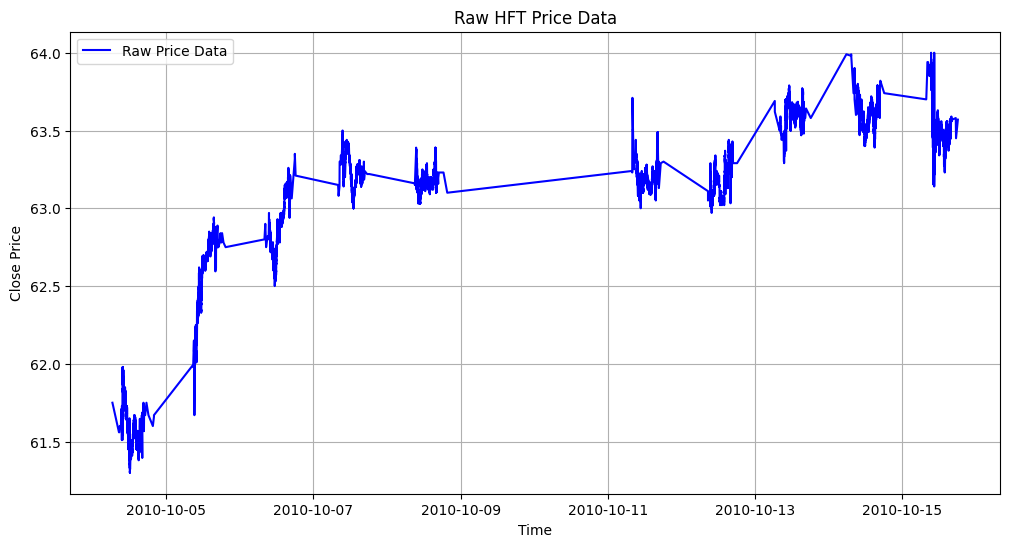

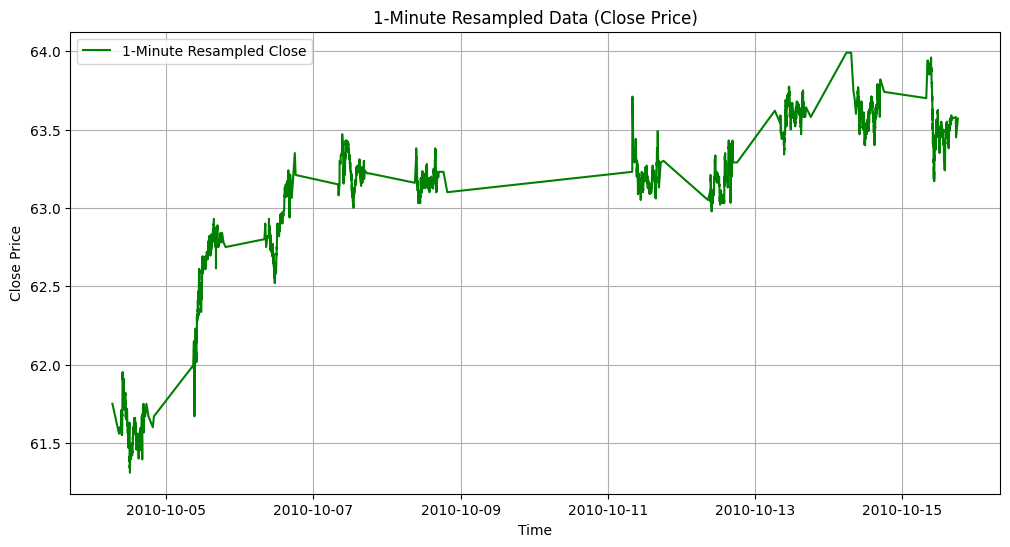

In [ ]:
#raw price data
plt.figure(figsize=(12, 6))
plt.plot(data.index,
         data['price'],
         label='Raw Price Data',
         color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Raw HFT Price Data')
plt.legend()
plt.grid()
plt.show()

#1-minute data (Close price)
plt.figure(figsize=(12, 6))
plt.plot(data_resampled.index,
         data_resampled['Close'],
         label='1-Minute Resampled Close',
         color='green')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('1-Minute Resampled Data (Close Price)')
plt.legend()
plt.grid()
plt.show()

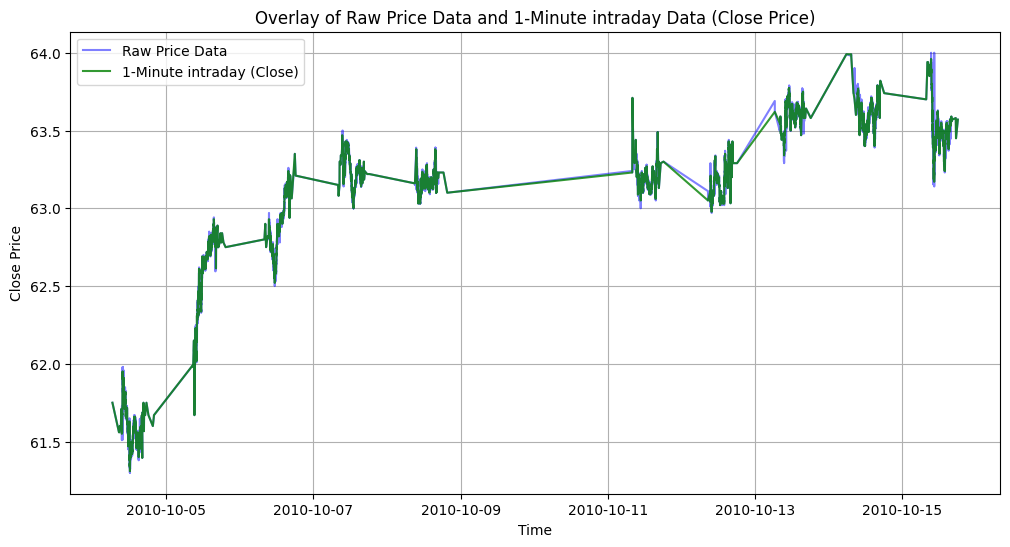

In [ ]:
#overlay to show similarity
plt.figure(figsize=(12, 6))
plt.plot(data.index,
         data['price'],
         label='Raw Price Data',
         color='blue',
         alpha=0.5)
plt.plot(data_resampled.index,
         data_resampled['Close'],
         label='1-Minute intraday (Close)',
         color='green',
         alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Overlay of Raw Price Data and 1-Minute intraday Data (Close Price)')
plt.legend()
plt.grid()
plt.show()

(c) Apply PCA to both data by calculating PC, variances and do visialization. What can you find?

In [ ]:
scaler_raw = StandardScaler()
scaler_resampled = StandardScaler()

features_raw = ['price', 'volume']
features_resampled = ['Close', 'Volume']

scaled_raw = scaler_raw.fit_transform(data[features_raw])
scaled_resampled = scaler_resampled.fit_transform(data_resampled[features_resampled])

#PCA raw
pca_raw = PCA(n_components=2)
pca_raw_components = pca_raw.fit_transform(scaled_raw)

#PCA resampled
pca_resampled = PCA(n_components=2)
pca_resampled_components = pca_resampled.fit_transform(scaled_resampled)

#VCRs
print("Explained variance ratio (Raw Data):", pca_raw.explained_variance_ratio_)
print("Explained variance ratio (Resampled Data):", pca_resampled.explained_variance_ratio_)

Explained variance ratio (Raw Data): [0.50154537 0.49845463]
Explained variance ratio (Resampled Data): [0.51335108 0.48664892]


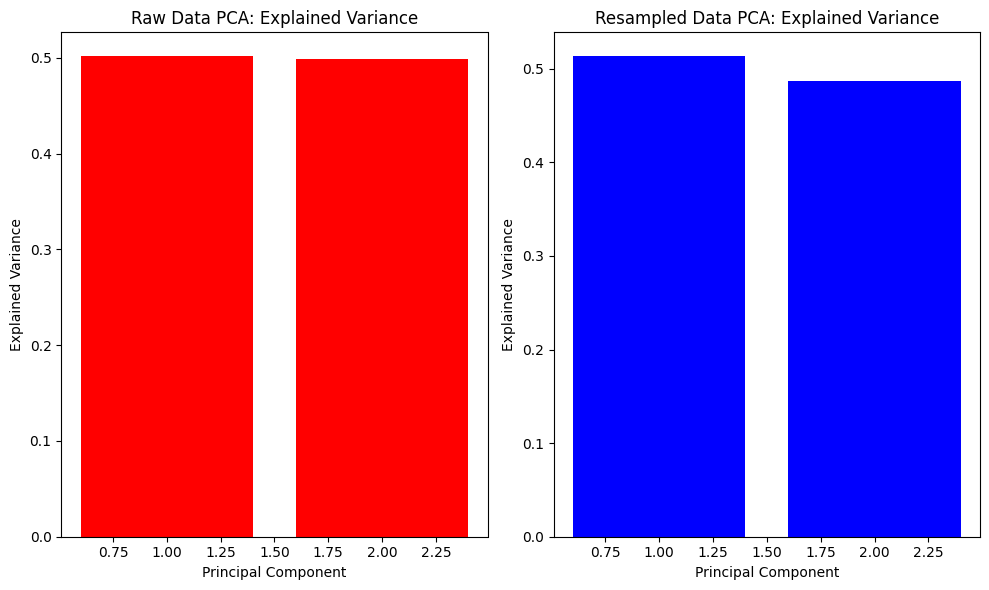

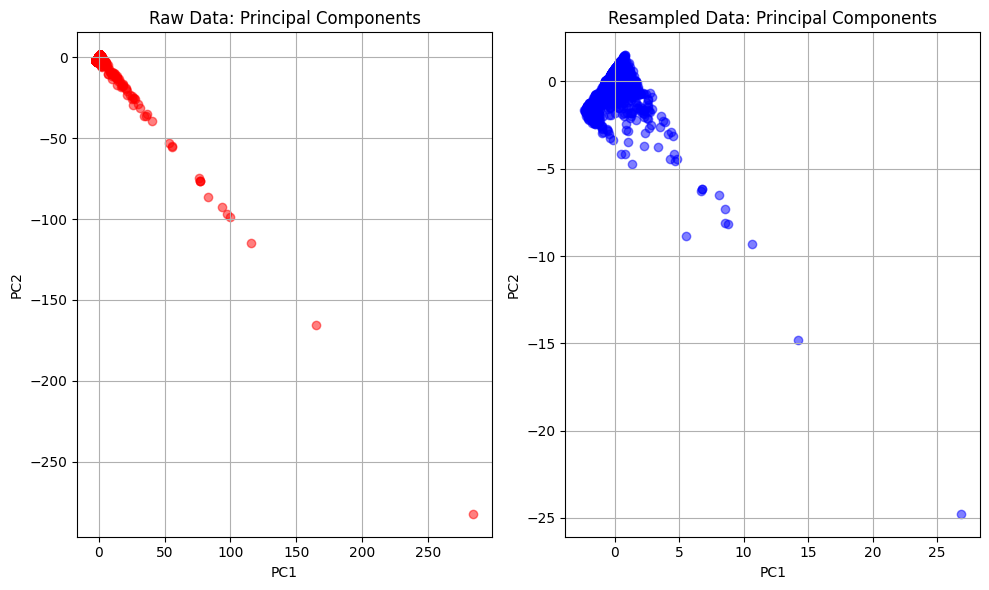

In [ ]:
#VR plot
plt.figure(figsize=(10, 6))
#Raw
plt.subplot(1, 2, 1)
plt.bar([1, 2], pca_raw.explained_variance_ratio_,
        color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Raw Data PCA: Explained Variance')

#Resampled
plt.subplot(1, 2, 2)
plt.bar([1, 2], pca_resampled.explained_variance_ratio_,
        color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Resampled Data PCA: Explained Variance')
plt.tight_layout()
plt.show()

#PC plot (first 2)
plt.figure(figsize=(10, 6))
#Raw
plt.subplot(1, 2, 1)
plt.scatter(pca_raw_components[:, 0],
            pca_raw_components[:, 1],
            color='red', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Raw Data: Principal Components')
plt.grid()

#Resampled
plt.subplot(1, 2, 2)
plt.scatter(pca_resampled_components[:, 0],
            pca_resampled_components[:, 1],
            color='blue', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Resampled Data: Principal Components')
plt.grid()

plt.tight_layout()
plt.show()

When looking at the explained variance ratios, both of the PCs are almost equally important in capturing the structure of the data as PC1 was 50.15% and PC2 was 49.85%. These results show that both of the principal components also contribute significantly to the data variability overall. The resampled data, on the other hand, resulted in a higher PC1 ratio at 51.34%. Thus meaning that after the resampling, the first principal component captured slightly more data variance than the other. This process of resampling maybe reduced volatility and noise which allowed the data's underlying structure to be more effectively captured by PC1.